In [75]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

In [76]:
df = pd.read_csv('insurance-mlr.csv')

In [77]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [78]:
data1 = df['sex'].to_numpy()
data2 = df['smoker'].to_numpy()
data3 = df['region'].to_numpy()
data1 = data1.reshape(-1,1)
data2 = data2.reshape(-1,1)
data3 = data3.reshape(-1,1)
encoder = OrdinalEncoder()
result1 = encoder.fit_transform(data1)
result2 = encoder.fit_transform(data2)
result3 = encoder.fit_transform(data3)


df['sex'] = result1
df['smoker'] = result2
df['region'] = result3
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [79]:
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [92]:
y = np.array(df['charges'])[:400]
df_features = df.drop(['charges'],axis=1)
dataset = df_features.to_numpy()[:400]
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42)


In [93]:
reg = LinearRegression().fit(X_train,y_train)
predicted = reg.predict(X_test)

## Testing with scikitlearn

In [94]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,predicted)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predicted))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predicted)))

r2 socre is 0.7686055181825807
mean_sqrd_error is== 39673374.52846482
root_mean_squared error of is== 6298.680379926006


In [95]:
X_train.shape

(320, 6)

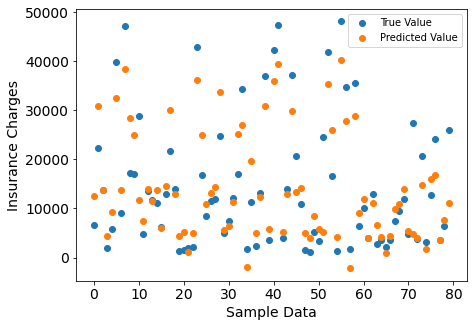

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))

x = np.arange(len(y_test))
plt.scatter(x, y_test,label="True Value")
plt.scatter(x, predicted,label="Predicted Value")
plt.xlabel('Sample Data', size=14)
plt.ylabel('Insurance Charges', size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.savefig('Insrurance.pdf',bbox_inches='tight')
plt.show()

In [97]:
X_train_num = np.dot(X_train,1).astype(int)
X_test_num = np.dot(X_test,1).astype(int)
y_train_num = y_train
y_test_num = y_test

In [98]:
X_train_den = np.full(X_train.shape, 1) 
X_test_den = np.full(X_test.shape, 1) 
y_train_den = np.ones(len(y_train))
y_test_den = np.ones(len(y_test))

In [99]:
X_train_den

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       ...,
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]])

In [100]:
reg = LinearRegression().fit(X_train_num,y_train)
predicted_num = reg.predict(X_test_num)

In [101]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,predicted_num)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predicted_num))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predicted_num)))

r2 socre is 0.7679632970373482
mean_sqrd_error is== 39783485.53813451
root_mean_squared error of is== 6307.4151233397115


In [110]:
#shortening numners 
def shorter(c,d):
    c = int(c)
    d = int(d)
    if(c<0):
        n = c*(-1)
        if(len(str(n))==len(str(d)) and len(str(n))>3):      
            a = f"{n:.0f}"
            a = str(a[:-3])
            a = int(a)*(-1)
            b = f"{d:.0f}"
            b = str(b[:-3])
            b = int(b)
        elif(len(str(n))>=3 and len(str(d))>=3):
            a = f"{n:.0f}"
            a = str(a)
            b = f"{d:.0f}"
            b = str(b)
            if(len(str(a))<len(str(b))):
                s = len(str(a))-2
            else:
                s = len(str(b))-2
            a = int(a[:-s])
            b = int(b[:-s])
            a = a*-1 
        else:
            a = int(n*-1)
            b = d
    elif(len(str(c))==len(str(d)) and len(str(c))>3):      
            a = f"{c:.0f}"
            a = str(a[:-2])
            a = int(a)
            b = f"{d:.0f}"
            b = str(b[:-2])
            b = int(b)
#     elif(len(str(c))==1 and len(str(d))>3):
#         a = int(0)
#         b = int(1)
    elif(len(str(c))>3 and len(str(d))>3):
            a = f"{c:.0f}"
            a = str(a)
            b = f"{d:.0f}"
            b = str(b)
            if(len(str(a))<len(str(b))):
                s = len(str(a))-3
            else:
                s = len(str(b))-3
            a = int(a[:-s])
            b = int(b[:-s])
    else:
        a = c
        b = d
    return a,b

#condensed function multiply and add matrix with numerator and denominator one row at a time
# Python Program to find the L.C.M. of two input number
from math import gcd
def compute_lcm(x, y):
   # choose the greater number 
    if (x > y):
        greater = x
    else:
        greater = y
    while(True):
        if(x==0):
            lcm = y
            break
        elif(y==0):
            lcm = x
            break
        elif((greater % x == 0) and (greater % y == 0)):
            lcm = greater
            break
        greater += 1
    return lcm
 
#Subtracting 2 numbers of the form a/b -c/d
def subtraction(a,b,c,d):
    den = compute_lcm(b,d)
    if b ==0:
        num = c ; den = d
    elif d==0:
        num= a ; den = b
    else:    
        num = ((den/b)*a) - ((den/d)*c)
    return num,den

#adding array of elements of the form x/y
def add_array(a_num,a_den):
    #will work for an int array of any length
    lcm = 1;sum1 =0
    for i in a_den:
        lcm = int(lcm*i/gcd(lcm, i))
#     print("lcm is ",lcm)
    for i in range(len(a_num)):
        sum1 = sum1 + (a_num[i]*(a_den[i]/lcm))
#         print(a_num[i],a_den[i],lcm)      
#     print("sum is ", sum1)
    return sum1,lcm

#adding two numbers of the form a/b + c/d
def addition(a,b,c,d):
    den = compute_lcm(b,d)
    if b ==0:
        num = c ; den = d
    elif d==0:
        num= a ; den = b
    else:    
        num = ((den/b)*a) + ((den/d)*c)
    return int(num),int(den)

#multiplying two arrays of fraction and adding them  for row by column multiplication
def multiply(a_num,a_den,b_num, b_den):
#     print(type(a_num))
    z_num = np.zeros(len(a_num)).astype(int)
    z_den = np.zeros(len(a_den)).astype(int)
#     print("printing anum,aden,bnum,bden",a_num,a_den,b_num,b_den)                                   
    for i in range(len(a_num)):
        z_num[i]=(a_num[i]*b_num[i])     
        z_den[i]=(a_den[i]*b_den[i])
    
    x = z_num.tolist()
    y = z_den.tolist()
#     print("Printing z_num and z_den", x , y )
    num,den = add_array(x,y)
#     print("multiplication results is",num,den) 
    return num,den

#claculate y_hat =wx+b | x is in the form a single array and w is in the form of array too
# need toc hange w into wnum and wden
def y_hat(w_num,w_den,x_num,x_den,b):
    y_hat_num = np.zeros(x_num.shape[0]).astype(int)
    y_hat_den = np.zeros(x_den.shape[0]).astype(int)
    #multiplying w and x
    for i in range(x_num.shape[0]):
#         print("iteration number ",i)
        x_n = x_num[i] 
        x_d = x_den[i] 
#         print(x_n,x_d,w_num,w_den)
        temp_n, temp_d = multiply(x_n,x_d,w_num,w_den)
#         print("printing temporary values",temp_n,temp_d)
        y_hat_num[i],y_hat_den[i] = addition( temp_n, temp_d,b[0],b[1])
        y_hat_num[i],y_hat_den[i] = shorter(y_hat_num[i],y_hat_den[i])   #trying this
        if(y_hat_num[i]>=10000 or y_hat_num[i]<=-10000):
                y_hat_num[i]= y_hat_num[i]/10000
        elif(y_hat_num[i]>=1000 or y_hat_num[i]<=-1000):
                y_hat_num[i]= y_hat_num[i]/1000
        elif(y_hat_num[i]>=100 or y_hat_num[i]<=-100):
                y_hat_num[i]= y_hat_num[i]/100
        else:
                 y_hat_num[i]= y_hat_num[i]/1
#     print("y_hat values for this iterationsa are",y_hat_num,y_hat_den)
    return y_hat_num,y_hat_den

#calculating mean square values
def mse(y_hat_num,y_hat_den,y_num,y_den,n):
    num=0;den =0
    for i in range(len(y_hat_num)):
        num1,den1=subtraction(y_num[i],y_den[i],y_hat_num[i],y_hat_den[i])
        num1 = num1*num1
        den1 = den1*den1
        num,den = addition(num,den,num1,den1)
    den = den * n
#     print(num,den)
    return num,den

#calculating subtraction of Y_hat Y
def y_hat_substraction(y_hat_num,y_hat_den,y_num,y_den):
    y_diff =np.zeros((y_hat_num.shape[0],2))
    for i in range(len(y_hat_num)):
        y_diff[i][0],y_diff[i][1] = subtraction(y_hat_num[i],y_hat_den[i], y_num[i], y_den[i])
    return y_diff

#getting delta w with respect 
#need change - can call the subtraction of y_hat from y
def delta_w(y_hat_diff,x_num, x_den, n):
    del_w_num = np.zeros(x_num.shape[1])
    del_w_den = np.zeros(x_num.shape[1])
    
    x_num = x_num.T
    x_den = x_den.T
    y_num = y_hat_diff[:,0]
    y_den = y_hat_diff[:,1]
    
#     print("getting delta w num and den ")
    for i in range(len(del_w_num)):
#         print("printing X",len(x_num[i]))
#         print("printing X",len(x_den[i]))
#         print("printing y diff",len( y_num))
#         print("printing y diff", len(y_den))
        del_w_num[i],del_w_den[i] = multiply(x_num[i],x_den[i],y_num,y_den)
        del_w_num[i] = del_w_num[i]*2 
        del_w_den[i] = del_w_den[i]*n
        
#     print("delta w num and den are",del_w_num,del_w_den)
    return del_w_num,del_w_den


#getting delta b 
def delta_b(y_hat_diff):

#     print(type(y_hat_diff))
    yh_num = np.array(y_hat_diff[:,0]).astype(int)
    yh_den = np.array(y_hat_diff[:,1]).astype(int)
#     print(type(yh_num[0]))
#     print(type(yh_den[0]))    
#     print("printing yh_num",yh_num)
#     print("printing yh_den",yh_den)
    num,den = add_array(yh_num, yh_den)
    num = num*2
    den = den*len(yh_num)
#     print("printing delta_b", num,den)
    return num,den

# get new weights and biases
def get_new_params(lr, dw_num,dw_den,db_num,db_den,w_num,w_den,b_num,b_den):
    
    for i in range(len(dw_num)):
        dw_num[i]= dw_num[i]*lr[0]
        dw_den[i]= dw_den[i]*lr[1]
   
    btemp_num = lr[0] * db_num
    btemp_den = lr[1] * db_den 

    for i in range(len(dw_num)):
        dw_num[i],dw_den[i] = subtraction(w_num[i],w_den[i],dw_num[i],dw_den[i]) 
    
    db_num,db_den = subtraction(b_num,b_den,btemp_num,btemp_den)
#     print("printing new weight parameters", dw_num,dw_den)
#     print("printing new bias parameters",db_num,db_den)
    return  dw_num,dw_den,db_num,db_den

#normalize weights and bias
def normalize_weights_bias(wnum,wden, bnum,bden):
    wn_num = np.zeros(6) 
    wn_den = np.zeros(6)
    for i in range (len(wf_num)):
        wn_num[i] = int((wnum[i]/wden[i]))
        wn_den[i] = 1
    bnum = int(bnum/bden)
    bden = 1
    
#     print("Normalizing weights and biases",wn_num,wn_den, bnum, bden)
    return wn_num, wn_den,bnum, bden

In [111]:
wnum = np.ones(6)
wden = np.ones(6)
b =[1,1]
bnum =1
bden =1
lr = [1,10]
loss_num =[]
loss_den=[]
for i in range(1000):
    yh_num,yh_den = y_hat(wnum,wden,X_train_num, X_train_den,b)
#     print("bias is ",(b))
    print("printing y_hat results",yh_num, yh_den)

    #getting MSE, MSE matches with my main code
    mse_num,mse_den= mse(yh_num, yh_den, y_train_num,y_train_den,len(yh_num))
    loss_num.append(mse_num)
    loss_den.append(mse_den)
#     print("loss is ",mse_num, mse_den)

    #getting y_hat differenc
    y_diff = y_hat_substraction(yh_num,yh_den,y_train_num,y_train_den)
    y_diff

    # get delta_W
    delw_num,delw_den = delta_w(y_diff,X_train_num,X_train_den, len(yh_num))
    print("printing delta weights", delw_num, delw_den)
    # get delta_b
    delb_num, delb_den = delta_b(y_diff)
    print("printing delta bias", delb_num, delb_den)
    #get new parameters
    wf_num,wf_den,bf_num,bf_den = get_new_params(lr, delw_num,delw_den,delb_num,delb_den,wnum,wden,bnum,bden)

    #normalize weights and bias parameters
    wnum,wden, bnum, bden = normalize_weights_bias(wf_num,wf_den,bf_num,bf_den)
    b[0] = bnum
    b[1] = bden
    print("printing intial parameters",wnum,wden,bnum,bden)
print(wnum,wden, bnum, bden)

printing y_hat results [58  1 86 40 55 56 45 80 60 63 92  1 79 72 89 63 66 48 87 94 63 91 84  1
 67 69 71 50 78 49 84 80 77  1 78 75 75 77 67  1 46  1 48 82 70  1 79 94
 70 87 47 73 82 89 64 56 76 96 59 67 99 62 61 86 75 87 75 90 81 52 83 85
 76 63 53 54 97 84 85 96 54 98 97 53 70 83 69 67 92 74 94 59 79 91 63 54
 97 52 79 68 51 65 50 46 70 71 61 50 88 52 55 83 80 91 89 55 93 59 81 98
 72 67 89 77 60 79 75 92 77 83 70 72 78 87 79 61 81 50 70 91 45 69 65 58
 67  1 78 82 68 73 90 68 75 87 88 82 71 83 99 82 98 93 78 70 75 95 59 61
 60 52 47 92 80 65 78 70 51 73 86 60 83 62 42 44  1 66 73 83 87 69 58 63
 72  1 80 72 81 89 84 83 63 93 68 76 70 95 64 84 78 84 66 64 56 95 53 96
 91 86 81 87 98 99 84 91 92 53 54 70 45 68 74 77 51 92 99 81 76 74 47 67
 57 42 47  1 89 81 66 77 84 58 72 54 96 78 54 53 75 56 77 60 58 71 59 80
 77 83 69 97 57 98 87 75 80 66  1 83 49 61 83 72 83 73 54 59 65 56 67 50
 80 87 97 68 95 67 88 71 44 66 53  1 81 94 53 86 81 41 63 77 87  1 81 43
 59 97 78 66 52 52 69 49] [1

printing delta bias -5875206.0 320
printing intial parameters [782260.   9972. 557142.  20521.  10035.  25510.] [1. 1. 1. 1. 1. 1.] 17920 1
printing y_hat results [3812 6619 6035 2363 3465 3589 2613 5380 3780 3822 6132 6911 5344 4509
 6102 3849 3832 3066 5569 6358 3835 6070 5743 6958 4569 4409 4308 3119
 5113 2995 5999 5313 4475 6716 5080 4876 4994 5056 4116 6462 2804 6887
 3083 5441 4463 7000 5313 6503 4352 5900 2832 4398 5340 5852 4184 3310
 5076 5953 3658 4194 6643 3736 3889 5620 4843 5804 4729 5931 5247 3102
 5445 5942 5131 4082 3407 3356 6401 5639 5699 6413 3364 6664 6278 3219
 4534 5755 4114 4132 6059 4938 6240 3486 5174 5911 3893 3402 6427 3108
 5141 4391 3158 3919 3128 2788 4585 4996 3783 3165 6009 3163 3595 5282
 5686 6191 6094 3391 6361 3532 5319 6453 4894 4125 6089 4814 3855 4881
 4749 6306 5028 5110 4191 4576 5053 5536 5321 3782 5234 3067 4674 6381
 2666 4515 3800 3391 4525 7181 5091 5486 4042 4834 6256 4397 4554 6211
 5517 5303 4631 5543 6688 5744 6587 6138 4960 4342 4446 

printing y_hat results [ 6290 10922  9956  3899  5718  5923  4311  8877  6238  6308 10117 11402
  8817  7441 10068  6352  6324  5059  9189 10491  6329 10015  9475 11480
  7539  7275  7109  5147  8436  4944  9897  8766  7386 11082  8382  8046
  8240  8343  6793 10663  4628 11363  5088  8979  7365 11549  8766 10729
  7181  9736  4674  7258  8810  9655  6903  5463  8375  9823  6037  6921
 10960  6165  6417  9273  7991  9576  7804  9786  8658  5120  8985  9804
  8465  6735  5622  5538 10561  9304  9403 10581  5552 10996 10360  5313
  7482  9495  6791  6818  9998  8148 10297  5753  8538  9752  6425  5614
 10605  5129  8484  7246  5211  6467  5163  4601  7565  8243  6242  5223
  9915  5220  5933  8715  9381 10215 10054  5595 10495  5829  8777 10647
  8076  6808 10046  7943  6362  8054  7837 10404  8296  8433  6916  7550
  8339  9135  8779  6242  8636  5061  7712 10527  4400  7450  6270  5596
  7467 11848  8400  9053  6671  7976 10322  7255  7515 10247  9104  8751
  7641  9146 11034  9477 108

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [-1.08224344e+08 -1.66710000e+06 -7.77434180e+07 -3.00060200e+06
 -3.01342200e+06 -3.37409600e+06] [320. 320. 320. 320. 320. 320.]
printing delta bias -2412752.0 320
printing intial parameters [1619844.   21663. 1156064.   43063.   26544.   52269.] [1. 1. 1. 1. 1. 1.] 36865 1
printing y_hat results [ 7899 13716 12502  4898  7182  7438  5415 11147  7835  7924 12704 14319
 11072  9346 12643  7979  7943  6353 11540 13174  7950 12577 11899 14417
  9468  9136  8929  6464 10594  6210 12428 11009  9279 13917 10526 10105
 10349 10477  8532 13392  5814 14270  6390 11276  9250 14504 11008 13473
  9020 12226  5871  9117 11064 12125  8669  6862 10517 12338  7582  8692
 13764  7744  8060 11647 10036 12026  9802 12289 10873  6431 11284 12311
 10631  8459  7061  6956 13263 11686 11809 13287  6974 13808 13012  6674
  9397 11923  8530  8564 12557 10233 12931  7226 10723 12247  8069  7050
 13318  6444 10655  9101  6545  8123  6485 

printing delta weights [-74037766.  -1278952. -53498618.  -2130262.  -2846078.  -2232740.] [320. 320. 320. 320. 320. 320.]
printing delta bias -1618076.0 320
printing intial parameters [1811548.   24795. 1294188.   48477.   32911.   58142.] [1. 1. 1. 1. 1. 1.] 41093 1
printing y_hat results [ 8837 15345 13985  5480  8035  8322  6059 12470  8766  8867 14211 16018
 12386 10456 14143  8928  8888  7108 12911 14738  8895 14070 13311 16129
 10592 10221  9991  7233 11851  6948 13901 12315 10383 15570 11776 11305
 11578 11721  9546 14983  6506 15963  7149 12615 10348 16226 12314 15072
 10092 13677  6569 10201 12376 13564  9698  7679 11766 13804  8483  9726
 15397  8666  9018 13030 11227 13453 10967 13747 12163  7195 12624 13772
 11892  9463  7900  7782 14837 13073 13211 14863  7803 15446 14559  7468
 10514 13338  9545  9581 14047 11448 14465  8085 11997 13701  9028  7888
 14899  7210 11921 10183  7322  9088  7256  6465 10628 11578  8771  7340
 13930  7336  8337 12245 13177 14351 14122  7863 14

printing y_hat results [ 9402 16326 14878  5831  8550  8855  6447 13267  9327  9436 15118 17041
 13178 11125 15046  9500  9458  7563 13738 15680  9466 14969 14162 17160
 11269 10875 10632  7696 12608  7394 14789 13102 11050 16565 12528 12027
 12319 12470 10158 15942  6923 16984  7607 13422 11010 17263 13101 16035
 10738 14551  6990 10855 13167 14431 10319  8172 12517 14688  9027 10349
 16381  9221  9595 13864 11946 14313 11669 14626 12941  7656 13431 14652
 12653 10068  8406  8280 15785 13910 14056 15812  8303 16432 15491  7947
 11187 14190 10158 10194 14946 12180 15390  8602 12765 14576  9606  8393
 15852  7673 12684 10835  7790  9670  7721  6879 11307 12317  9333  7809
 14820  7807  8871 13029 14018 15268 15024  8367 15684  8720 13122 15915
 12070 10182 15015 11874  9512 12042 11719 15549 12404 12611 10340 11288
 12466 13658 13122  9333 12910  7568 11526 15731  6580 11138  9376  8370
 11161 17709 12555 13532  9976 11920 15425 10844 11238 15312 13611 13080
 11422 13672 16491 14162 162

printing delta weights [-36484156.   -852428. -26856804.  -1173870.  -2662168.   -978544.] [320. 320. 320. 320. 320. 320.]
printing delta bias -744866.0 320
printing intial parameters [2021378.   28951. 1447008.   54809.   44021.   64168.] [1. 1. 1. 1. 1. 1.] 45544 1
printing y_hat results [ 9867 17134 15612  6121  8974  9293  6766 13922  9789  9905 15865 17883
 13829 11677 15789  9971  9928  7937 14418 16455  9936 15709 14862 18008
 11826 11413 11159  8078 13231  7761 15518 13749 11600 17384 13148 12622
 12929 13086 10661 16731  7267 17823  7984 14086 11555 18116 13748 16827
 11270 15270  7337 11394 13817 15143 10829  8578 13136 15416  9474 10862
 17190  9680 10071 14551 12537 15020 12248 15348 13581  8036 14096 15375
 13278 10566  8823  8691 16564 14599 14751 16592  8716 17244 16259  8342
 11742 14890 10664 10699 15685 12783 16150  9029 13397 15296 10083  8808
 16636  8055 13312 11372  8176 10150  8105  7220 11867 12924  9795  8196
 15553  8195  9311 13674 14709 16022 15766  8782 164

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [-24865676.   -720370. -18609692.   -877802.  -2605210.   -590286.] [320. 320. 320. 320. 320. 320.]
printing delta bias -474588.0 320
printing intial parameters [2085879.   30638. 1494890.   56983.   49766.   65794.] [1. 1. 1. 1. 1. 1.] 46814 1
printing y_hat results [10186 17687 16114  6320  9265  9594  6986 14370 10106 10228 16376 18459
 14274 12055 16298 10295 10250  8194 14885 16986 10259 16216 15341 18589
 12208 11782 11522  8340 13658  8013 16017 14192 11978 17946 13572 13030
 13347 13508 11007 17273  7504 18399  8243 14541 11929 18701 14191 17369
 11636 15762  7575 11764 14262 15632 11178  8858 13559 15916  9782 11214
 17744  9994 10397 15022 12942 15505 12645 15843 14019  8297 14551 15871
 13706 10908  9109  8972 17098 15071 15227 17125  8999 17799 16786  8614
 12123 15370 11011 11045 16192 13196 16671  9321 13830 15789 10409  9093
 17173  8317 13742 11741  8440 10479  8368  7454 12250 13340 10112  8462
 1

printing y_hat results [10404 18067 16457  6456  9465  9801  7136 14677 10323 10450 16725 18854
 14580 12314 16646 10517 10472  8370 15205 17350 10481 16564 15669 18987
 12470 12035 11771  8520 13950  8187 16358 14495 12239 18330 13863 13309
 13633 13797 11245 17644  7667 18792  8421 14853 12185 19102 14494 17740
 11887 16099  7738 12018 14567 15966 11418  9050 13850 16259  9993 11456
 18123 10211 10621 15345 13220 15836 12918 16181 14320  8476 14863 16210
 13999 11142  9305  9166 17464 15395 15553 17490  9194 18179 17148  8801
 12384 15698 11250 11283 16539 13479 17028  9522 14127 16127 10634  9289
 17542  8498 14038 11994  8621 10705  8549  7614 12512 13623 10330  8644
 16398  8645  9820 14419 15506 16893 16620  9262 17351  9658 14523 17610
 13355 11275 16614 13141 10529 13328 12974 17201 13728 13963 11445 12492
 13797 15117 14519 10331 14287  8377 12752 17402  7286 12326 10380  9270
 12350 19595 13892 14974 11045 13186 17065 12000 12442 16937 15064 14473
 12639 15129 18244 15665 179

printing delta weights [-10820650.   -560556.  -8629396.   -519522.  -2536234.   -120470.] [320. 320. 320. 320. 320. 320.]
printing delta bias -147580.0 320
printing intial parameters [2162942.   33557. 1554062.   60084.   61776.   67234.] [1. 1. 1. 1. 1. 1.] 48111 1
printing y_hat results [10571 18357 16718  6561  9618  9958  7252 14911 10490 10621 16991 19154
 14812 12513 16911 10688 10643  8504 15450 17627 10651 16829 15920 19291
 12669 12228 11962  8658 14173  8320 16617 14726 12440 18624 14084 13522
 13852 14017 11427 17928  7792 19093  8557 15092 12381 19407 14724 18023
 12079 16356  7864 12214 14799 16221 11600  9198 14071 16522 10154 11641
 18412 10378 10793 15592 13433 16089 13127 16439 14549  8613 15102 16468
 14223 11320  9456  9314 17743 15643 15802 17768  9343 18469 17425  8944
 12585 15948 11435 11465 16805 13696 17300  9676 14354 16385 10806  9438
 17823  8637 14264 12188  8760 10879  8688  7737 12713 13839 10496  8783
 16661  8786  9979 14650 15752 17164 16884  9412 176

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [-7.279978e+06 -5.201560e+05 -6.108172e+06 -4.289560e+05 -2.518780e+06
 -1.766000e+03] [320. 320. 320. 320. 320. 320.]
printing delta bias -65004.0 320
printing intial parameters [2181944.   34728. 1569615.   61098.   67297.   67338.] [1. 1. 1. 1. 1. 1.] 48321 1
printing y_hat results [10668 18525 16870  6623  9707 10051  7319 15047 10587 10721 17146 19329
 14947 12629 17065 10788 10743  8583 15592 17788 10752 16983 16065 19468
 12785 12341 12074  8739 14303  8398 16767 14861 12558 18795 14213 13646
 13980 14145 11534 18094  7866 19268  8636 15231 12495 19585 14858 18187
 12191 16506  7937 12328 14934 16368 11707  9285 14199 16676 10249 11749
 18580 10475 10893 15737 13557 16236 13249 16589 14682  8694 15241 16618
 14353 11425  9544  9400 17905 15788 15947 17929  9431 18637 17588  9029
 12702 16093 11543 11571 16959 13822 17458  9766 14487 16534 10906  9525
 17987  8719 14396 12302  8840 10980  8770  7809 12829 13

printing y_hat results [10749 18667 16996  6675  9783 10128  7376 15160 10669 10807 17274 19475
 15060 12727 17193 10873 10828  8649 15713 17923 10837 17112 16187 19616
 12882 12435 12169  8807 14411  8465 16892 14972 12659 18938 14321 13750
 14087 14252 11624 18233  7929 19414  8704 15347 12591 19734 14970 18324
 12286 16631  7999 12425 15046 16492 11795  9360 14306 16805 10329 11841
 18720 10559 10978 15858 13661 16359 13353 16714 14794  8762 15357 16743
 14461 11512  9618  9473 18040 15909 16068 18062  9506 18776 17725  9100
 12801 16213 11636 11660 17089 13928 17590  9842 14598 16659 10991  9599
 18124  8789 14507 12397  8908 11066  8839  7869 12927 14068 10675  8933
 16941  8940 10151 14899 16013 17452 17164  9573 17920  9989 15007 18194
 13796 11658 17163 13579 10881 13774 13412 17766 14187 14436 11828 12908
 14257 15623 14998 10679 14762  8659 13172 17971  7532 12737 10730  9586
 12758 20243 14352 15470 11418 13619 17626 12397 12862 17490 15567 14953
 13058 15631 18843 16178 185

printing delta weights [-2819980.  -469102. -2921744.  -314524. -2496676.   148222.] [320. 320. 320. 320. 320. 320.]
printing delta bias 39292.0 320
printing intial parameters [2204908.   37167. 1590562.   62890.   79816.   66888.] [1. 1. 1. 1. 1. 1.] 48323 1
printing y_hat results [10790 18738 17058  6701  9822 10167  7405 15216 10710 10851 17338 19547
 15116 12776 17257 10916 10871  8682 15773 17991 10880 17176 16248 19690
 12931 12483 12218  8842 14465  8499 16954 15028 12712 19009 14375 13803
 14141 14306 11670 18304  7961 19487  8738 15406 12639 19808 15025 18392
 12334 16693  8031 12475 15102 16554 11840  9398 14360 16871 10369 11888
 18790 10601 11021 15920 13713 16421 13405 16777 14850  8796 15415 16805
 14515 11556  9656  9510 18107 15971 16129 18129  9544 18846 17794  9137
 12851 16273 11683 11705 17154 13981 17656  9880 14655 16721 11034  9636
 18193  8825 14563 12446  8942 11110  8874  7900 12976 14119 10717  8968
 17004  8976 10191 14956 16072 17518 17227  9611 17986 10031

printing delta weights [-1683766.  -455980. -2103848.  -285142. -2490976.   186724.] [320. 320. 320. 320. 320. 320.]
printing delta bias 66022.0 320
printing intial parameters [2210257.   38315. 1596641.   63630.   86045.   66456.] [1. 1. 1. 1. 1. 1.] 48183 1
printing y_hat results [10821 18792 17104  6722  9851 10198  7427 15259 10742 10886 17386 19602
 15159 12814 17305 10950 10905  8708 15820 18042 10914 17225 16294 19746
 12968 12519 12256  8869 14506  8525 16999 15070 12753 19064 14416 13842
 14182 14346 11706 18358  7987 19543  8764 15451 12676 19865 15067 18443
 12372 16740  8056 12514 15144 16600 11874  9428 14401 16922 10401 11924
 18843 10635 11055 15967 13754 16467 13446 16824 14892  8823 15460 16852
 14557 11589  9685  9539 18158 16018 16175 18178  9574 18898 17848  9166
 12890 16319 11721 11740 17204 14022 17707  9910 14698 16769 11068  9664
 18245  8853 14607 12484  8968 11144  8902  7923 13013 14157 10749  8995
 17053  9004 10222 15000 16115 17568 17275  9640 18036 10063

printing delta weights [-1102224.  -449202. -1682482.  -269990. -2488026.   206560.] [320. 320. 320. 320. 320. 320.]
printing delta bias 79776.0 320
printing intial parameters [2212745.   39160. 1600100.   64145.   90709.   66081.] [1. 1. 1. 1. 1. 1.] 48041 1
printing y_hat results [10837 18820 17128  6733  9867 10213  7439 15280 10759 10905 17410 19630
 15180 12834 17329 10968 10923  8721 15844 18068 10932 17250 16317 19775
 12987 12538 12276  8883 14527  8539 17022 15092 12776 19092 14437 13863
 14203 14367 11725 18386  8000 19571  8778 15474 12695 19894 15088 18469
 12391 16764  8069 12534 15166 16624 11891  9445 14421 16949 10417 11942
 18869 10653 11072 15991 13774 16491 13467 16847 14914  8838 15483 16876
 14577 11606  9700  9554 18184 16042 16199 18203  9590 18925 17876  9182
 12911 16341 11741 11758 17229 14043 17732  9926 14720 16792 11085  9679
 18272  8868 14629 12503  8981 11162  8917  7936 13032 14176 10765  9008
 17077  9019 10238 15022 16137 17593 17298  9655 18061 10081

printing delta weights [ -625276.  -443582. -1333540.  -257438. -2485564.   222976.] [320. 320. 320. 320. 320. 320.]
printing delta bias 91146.0 320
printing intial parameters [2214524.   40132. 1603316.   64715.   96145.   65604.] [1. 1. 1. 1. 1. 1.] 47847 1
printing y_hat results [10850 18843 17146  6743  9880 10226  7449 15298 10772 10921 17429 19652
 15198 12851 17348 10983 10939  8732 15864 18089 10948 17271 16336 19798
 13003 12553 12293  8895 14544  8551 17040 15109 12795 19115 14454 13879
 14221 14383 11741 18409  8012 19594  8789 15493 12711 19917 15105 18490
 12408 16783  8080 12552 15183 16642 11905  9459 14438 16971 10431 11958
 18891 10668 11087 16012 13791 16510 13485 16866 14932  8850 15502 16895
 14594 11620  9713  9566 18205 16062 16218 18222  9603 18946 17900  9195
 12928 16359 11759 11773 17250 14061 17753  9939 14739 16812 11100  9691
 18294  8882 14647 12520  8992 11177  8929  7946 13048 14191 10779  9020
 17097  9032 10251 15041 16154 17614 17317  9668 18080 10096

printing intial parameters [2215365.   40957. 1605573.   65186.  100801.   65172.] [1. 1. 1. 1. 1. 1.] 47666 1
printing y_hat results [10858 18856 17156  6749  9888 10234  7455 15308 10781 10931 17440 19665
 15208 12861 17360 10993 10949  8738 15877 18101 10958 17283 16347 19812
 13012 12562 12304  8903 14554  8559 17050 15119 12808 19128 14464 13889
 14232 14393 11751 18423  8020 19608  8797 15504 12720 19931 15115 18502
 12418 16795  8086 12563 15193 16654 11913  9468 14448 16985 10440 11968
 18903 10678 11096 16024 13802 16521 13497 16878 14942  8857 15513 16906
 14604 11629  9721  9574 18217 16075 16230 18233  9612 18958 17915  9204
 12939 16370 11771 11782 17263 14071 17765  9947 14750 16823 11109  9698
 18307  8890 14659 12530  8999 11186  8937  7952 13057 14199 10788  9027
 17109  9041 10260 15052 16164 17626 17328  9676 18092 10106 15163 18377
 13933 11789 17333 13719 10996 13918 13559 17937 14335 14596 11953 13041
 14405 15787 15147 10794 14913  8751 13301 18142  7615 12868 10

printing delta bias 105050.0 320
printing intial parameters [2215833.   42185. 1608363.   65871.  107780.   64495.] [1. 1. 1. 1. 1. 1.] 47375 1
printing y_hat results [10866 18870 17166  6755  9897 10243  7461 15317 10790 10943 17450 19678
 15217 12872 17370 11003 10960  8745 15889 18114 10969 17295 16358 19826
 13021 12572 12315  8911 14563  8568 17059 15128 12823 19142 14474 13899
 14242 14403 11762 18438  8029 19621  8804 15515 12730 19945 15124 18513
 12429 16805  8094 12575 15202 16664 11922  9478 14457 17000 10449 11979
 18915 10689 11105 16037 13812 16532 13509 16888 14953  8865 15524 16916
 14614 11637  9730  9582 18229 16087 16241 18243  9621 18969 17930  9213
 12950 16380 11784 11792 17275 14082 17777  9955 14761 16834 11118  9706
 18320  8900 14671 12541  9006 11196  8946  7959 13067 14206 10796  9034
 17121  9050 10269 15063 16173 17638 17337  9684 18102 10117 15175 18390
 13942 11801 17345 13730 11005 13930 13571 17948 14347 14610 11963 13051
 14417 15800 15157 10803 14925

printing y_hat results [10869 18877 17170  6759  9902 10247  7465 15321 10795 10950 17455 19683
 15222 12877 17375 11009 10966  8749 15896 18119 10975 17300 16363 19833
 13025 12576 12322  8915 14568  8572 17063 15132 12831 19148 14479 13904
 14248 14407 11768 18446  8034 19628  8808 15521 12735 19952 15128 18518
 12435 16811  8098 12581 15206 16669 11926  9484 14461 17008 10454 11985
 18921 10695 11110 16044 13817 16537 13515 16893 14958  8870 15530 16921
 14618 11641  9734  9586 18234 16094 16246 18247  9627 18974 17939  9219
 12956 16384 11791 11797 17282 14087 17782  9960 14767 16839 11123  9710
 18327  8906 14677 12547  9009 11202  8951  7962 13071 14209 10801  9038
 17126  9055 10274 15069 16176 17643 17341  9689 18107 10124 15181 18396
 13946 11808 17350 13735 11010 13936 13578 17953 14353 14618 11969 13057
 14422 15807 15161 10808 14930  8763 13314 18156  7626 12883 10861  9712
 12899 20465 14510 15642 11559 13763 17812 12534 13022 17667 15748 15118
 13203 15806 19042 16344 187

printing y_hat results [10872 18881 17171  6762  9905 10250  7467 15324 10798 10955 17457 19687
 15224 12881 17378 11013 10971  8751 15901 18123 10980 17304 16367 19837
 13028 12580 12327  8918 14571  8576 17064 15135 12838 19152 14482 13907
 14252 14410 11772 18451  8038 19632  8811 15525 12739 19956 15130 18521
 12439 16814  8101 12587 15209 16672 11928  9489 14464 17014 10458 11989
 18924 10700 11114 16049 13821 16540 13520 16896 14961  8873 15534 16924
 14621 11644  9738  9589 18237 16099 16250 18249  9631 18977 17945  9223
 12961 16386 11797 11800 17286 14091 17786  9964 14772 16842 11127  9712
 18331  8910 14681 12552  9011 11206  8954  7965 13074 14211 10804  9041
 17130  9060 10277 15073 16178 17647 17343  9692 18109 10130 15185 18400
 13949 11813 17354 13739 11014 13940 13584 17955 14357 14625 11973 13060
 14427 15812 15164 10812 14934  8766 13316 18158  7629 12886 10865  9717
 12902 20469 14513 15646 11564 13765 17814 12537 13027 17669 15753 15122
 13206 15809 19045 16346 187

printing y_hat results [10874 18884 17172  6764  9908 10252  7469 15325 10800 10960 17458 19688
 15226 12884 17379 11017 10975  8753 15904 18125 10984 17306 16369 19840
 13030 12582 12331  8921 14572  8579 17065 15136 12844 19155 14484 13909
 14254 14411 11776 18455  8041 19634  8814 15528 12741 19959 15131 18523
 12442 16816  8103 12591 15210 16674 11930  9493 14466 17018 10461 11992
 18926 10704 11117 16053 13824 16542 13524 16897 14963  8876 15536 16925
 14622 11646  9741  9592 18239 16102 16252 18250  9634 18978 17950  9227
 12965 16387 11803 11803 17289 14093 17788  9966 14775 16844 11130  9714
 18334  8914 14684 12555  9013 11210  8958  7967 13076 14211 10807  9043
 17132  9063 10280 15076 16179 17649 17344  9695 18110 10134 15188 18403
 13951 11817 17356 13742 11016 13943 13588 17956 14360 14630 11975 13063
 14430 15816 15166 10815 14937  8768 13317 18159  7632 12889 10868  9721
 12904 20472 14515 15648 11567 13766 17816 12539 13032 17669 15756 15124
 13208 15812 19046 16346 187

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  293740.  -432016.  -619710.  -231682. -2480300.   256550.] [320. 320. 320. 320. 320. 320.]
printing delta bias 114142.0 320
printing intial parameters [2214327.   45970. 1614703.   67918.  129480.   62280.] [1. 1. 1. 1. 1. 1.] 46391 1
printing y_hat results [10875 18886 17172  6766  9910 10254  7471 15326 10802 10964 17458 19689
 15226 12887 17379 11020 10978  8754 15907 18127 10987 17308 16370 19841
 13031 12583 12335  8923 14573  8582 17064 15137 12850 19157 14485 13910
 14256 14412 11779 18458  8044 19636  8816 15530 12743 19960 15131 18523
 12445 16816  8105 12594 15210 16674 11931  9497 14466 17022 10463 11995
 18927 10707 11120 16055 13826 16543 13527 16898 14964  8878 15538 16926
 14623 11647  9743  9594 18240 16104 16254 18249  9637 18979 17954  9230
 12967 16387 11807 11805 17291 14095 17789  9968 14777 16845 11133  9716
 18336  8918 14687 12558  9014 11212  8960  7969 13077 14210 10809  9045
 17133  9

printing y_hat results [10875 18888 17170  6768  9913 10256  7472 15326 10804 10968 17458 19689
 15227 12889 17379 11023 10982  8755 15909 18127 10990 17308 16370 19842
 13032 12585 12338  8925 14573  8584 17062 15137 12855 19158 14486 13911
 14258 14412 11781 18461  8047 19637  8817 15531 12744 19961 15131 18523
 12448 16817  8107 12598 15210 16674 11931  9501 14467 17026 10465 11997
 18927 10711 11122 16058 13827 16543 13530 16898 14965  8880 15539 16925
 14624 11648  9745  9595 18240 16107 16255 18248  9640 18978 17958  9233
 12970 16387 11812 11807 17292 14097 17790  9970 14779 16845 11135  9717
 18337  8921 14689 12561  9015 11215  8963  7970 13078 14209 10810  9046
 17134  9069 10285 15080 16177 17651 17343  9699 18110 10142 15193 18406
 13952 11825 17357 13745 11020 13948 13595 17956 14365 14638 11980 13066
 14434 15822 15167 10820 14940  8771 13318 18158  7636 12892 10873  9728
 12906 20474 14516 15651 11573 13765 17815 12540 13038 17667 15761 15126
 13210 15815 19046 16345 187

printing intial parameters [2212809.   47980. 1617453.   68991.  141098.   61065.] [1. 1. 1. 1. 1. 1.] 45844 1
printing y_hat results [10876 18889 17169  6770  9914 10257  7473 15325 10805 10971 17457 19689
 15226 12890 17378 11025 10984  8756 15911 18127 10993 17309 16370 19842
 13032 12585 12341  8927 14573  8586 17061 15136 12860 19159 14486 13912
 14259 14412 11784 18463  8050 19637  8818 15532 12745 19962 15130 18522
 12449 16817  8109 12600 15210 16674 11932  9503 14467 17028 10467 11999
 18926 10713 11124 16059 13828 16543 13532 16897 14966  8882 15540 16925
 14623 11649  9746  9597 18240 16108 16255 18247  9643 18977 17961  9236
 12972 16386 11816 11808 17293 14098 17790  9972 14780 16845 11137  9718
 18338  8924 14690 12563  9015 11217  8965  7971 13079 14207 10811  9047
 17134  9072 10286 15081 16175 17651 17342  9700 18108 10146 15194 18406
 13952 11828 17357 13746 11021 13949 13598 17955 14366 14641 11981 13067
 14435 15823 15167 10822 14941  8772 13317 18156  7638 12893 10

printing y_hat results [10876 18889 17167  6771  9916 10257  7474 15324 10806 10974 17456 19688
 15226 12892 17377 11027 10987  8757 15912 18127 10995 17309 16370 19842
 13032 12586 12343  8928 14573  8588 17059 15136 12864 19159 14486 13912
 14259 14412 11785 18464  8052 19637  8820 15533 12746 19962 15129 18521
 12451 16816  8110 12603 15209 16673 11932  9506 14466 17030 10469 12001
 18925 10716 11125 16061 13829 16543 13534 16896 14966  8883 15540 16924
 14623 11649  9748  9598 18239 16109 16255 18245  9645 18976 17963  9238
 12974 16385 11819 11809 17294 14098 17790  9973 14781 16844 11138  9719
 18338  8927 14692 12564  9016 11219  8966  7972 13079 14205 10812  9048
 17134  9074 10288 15082 16174 17651 17340  9702 18107 10149 15195 18407
 13952 11831 17357 13747 11022 13950 13600 17954 14368 14644 11982 13068
 14436 15825 15167 10823 14942  8774 13317 18155  7639 12894 10876  9733
 12906 20474 14517 15652 11577 13764 17814 12541 13043 17663 15763 15127
 13211 15816 19044 16342 187

printing y_hat results [10876 18889 17166  6772  9917 10258  7475 15324 10807 10977 17454 19687
 15225 12893 17376 11029 10989  8757 15913 18127 10997 17308 16369 19842
 13032 12586 12345  8929 14572  8590 17057 15135 12867 19159 14486 13912
 14260 14412 11787 18465  8054 19637  8820 15533 12746 19962 15128 18520
 12452 16816  8111 12605 15208 16673 11931  9508 14466 17032 10470 12002
 18925 10718 11126 16062 13829 16542 13536 16896 14966  8884 15540 16923
 14623 11649  9749  9599 18239 16110 16255 18243  9646 18975 17965  9240
 12975 16384 11822 11810 17294 14099 17789  9974 14782 16844 11139  9719
 18338  8929 14692 12566  9016 11220  8968  7972 13079 14204 10813  9049
 17133  9076 10289 15082 16172 17651 17338  9702 18106 10151 15196 18407
 13951 11833 17357 13748 11023 13951 13602 17953 14368 14647 11983 13068
 14437 15826 15167 10824 14942  8774 13316 18153  7640 12894 10878  9736
 12906 20474 14516 15652 11579 13763 17812 12541 13045 17661 15764 15127
 13211 15816 19043 16340 187

printing y_hat results [10876 18890 17164  6773  9918 10259  7476 15323 10808 10979 17453 19686
 15224 12894 17375 11031 10991  8758 15914 18126 10999 17308 16369 19842
 13032 12587 12347  8930 14572  8591 17054 15134 12871 19159 14486 13912
 14260 14411 11789 18466  8056 19636  8821 15534 12747 19961 15127 18519
 12454 16815  8112 12607 15207 16672 11931  9511 14465 17034 10471 12003
 18923 10720 11127 16063 13830 16542 13537 16895 14965  8885 15540 16922
 14622 11649  9750  9600 18238 16111 16255 18241  9648 18973 17967  9242
 12977 16382 11825 11810 17294 14099 17789  9975 14783 16843 11140  9719
 18338  8931 14693 12567  9016 11222  8969  7973 13079 14202 10814  9049
 17133  9078 10290 15083 16170 17651 17337  9704 18104 10154 15197 18406
 13951 11835 17356 13748 11024 13952 13604 17951 14369 14649 11984 13069
 14437 15827 15166 10826 14942  8775 13316 18151  7641 12895 10879  9738
 12906 20473 14516 15652 11581 13761 17811 12540 13047 17659 15765 15126
 13211 15816 19041 16338 187

printing delta weights [  357362.  -430236.  -518998.  -227918. -2479298.   261192.] [320. 320. 320. 320. 320. 320.]
printing delta bias 117086.0 320
printing intial parameters [2209922.   51464. 1621812.   70837.  161222.   58934.] [1. 1. 1. 1. 1. 1.] 44882 1
printing y_hat results [10876 18890 17162  6774  9919 10259  7476 15322 10809 10982 17451 19684
 15223 12894 17374 11032 10993  8758 15915 18126 11001 17308 16368 19841
 13032 12587 12349  8931 14571  8593 17052 15133 12874 19158 14485 13912
 14260 14410 11790 18467  8058 19636  8822 15534 12747 19961 15126 18518
 12455 16814  8113 12609 15206 16671 11931  9513 14464 17036 10472 12005
 18922 10722 11128 16064 13830 16541 13538 16894 14965  8886 15540 16921
 14622 11649  9751  9600 18237 16112 16254 18239  9650 18972 17968  9243
 12978 16381 11828 11811 17294 14099 17788  9976 14784 16842 11141  9720
 18338  8933 14694 12569  9016 11223  8971  7974 13079 14200 10814  9050
 17133  9079 10291 15083 16169 17650 17335  9704 18103 1015

printing y_hat results [10876 18890 17160  6775  9919 10260  7477 15321 10809 10984 17450 19684
 15223 12895 17373 11033 10994  8758 15915 18125 11002 17307 16368 19841
 13032 12587 12350  8932 14571  8594 17051 15133 12877 19158 14485 13912
 14261 14410 11791 18468  8059 19636  8823 15534 12747 19961 15125 18517
 12456 16813  8114 12610 15206 16670 11931  9515 14464 17037 10473 12005
 18922 10724 11129 16064 13830 16540 13540 16893 14965  8887 15540 16920
 14621 11649  9751  9601 18236 16112 16254 18237  9651 18971 17970  9245
 12979 16380 11830 11811 17294 14100 17788  9977 14784 16841 11142  9720
 18338  8935 14695 12570  9016 11224  8972  7974 13078 14198 10815  9050
 17132  9081 10292 15084 16167 17650 17334  9705 18101 10158 15198 18406
 13950 11839 17355 13749 11025 13953 13607 17949 14371 14653 11986 13069
 14438 15829 15165 10828 14943  8776 13314 18148  7643 12895 10881  9741
 12905 20472 14515 15651 11583 13760 17809 12540 13050 17655 15766 15126
 13211 15816 19039 16335 187

printing y_hat results [10876 18890 17158  6776  9921 10260  7478 15320 10810 10986 17448 19682
 15222 12896 17371 11035 10996  8759 15916 18125 11004 17307 16367 19840
 13032 12587 12352  8933 14570  8595 17048 15132 12880 19158 14485 13912
 14261 14409 11793 18469  8061 19635  8824 15534 12748 19960 15124 18516
 12457 16813  8115 12612 15204 16669 11930  9517 14463 17038 10474 12007
 18920 10726 11130 16065 13831 16539 13541 16892 14965  8888 15540 16918
 14620 11649  9752  9602 18235 16113 16254 18235  9653 18969 17972  9247
 12981 16379 11833 11812 17294 14100 17787  9978 14785 16840 11143  9720
 18338  8937 14695 12571  9016 11226  8973  7975 13078 14196 10816  9051
 17131  9082 10293 15084 16165 17649 17332  9706 18099 10161 15198 18406
 13949 11841 17354 13749 11026 13954 13609 17947 14371 14656 11987 13070
 14439 15830 15164 10829 14943  8777 13314 18145  7644 12896 10882  9744
 12905 20471 14515 15651 11585 13758 17807 12540 13052 17653 15766 15126
 13211 15815 19037 16333 187

printing y_hat results [10875 18889 17156  6778  9922 10261  7478 15319 10810 10989 17447 19681
 15221 12897 17370 11037 10998  8759 15917 18124 11006 17306 16366 19840
 13031 12587 12354  8934 14569  8597 17046 15130 12884 19157 14484 13911
 14261 14408 11794 18470  8063 19634  8824 15534 12748 19960 15122 18514
 12458 16812  8115 12614 15203 16668 11930  9519 14462 17040 10475 12008
 18919 10728 11131 16066 13831 16539 13542 16890 14964  8889 15540 16917
 14619 11649  9753  9602 18234 16113 16253 18233  9655 18967 17973  9249
 12982 16377 11836 11812 17294 14100 17787  9979 14785 16839 11144  9721
 18338  8939 14696 12572  9016 11227  8975  7975 13078 14194 10816  9051
 17131  9084 10294 15085 16163 17649 17330  9707 18098 10164 15199 18405
 13948 11843 17353 13750 11027 13955 13611 17946 14372 14658 11988 13070
 14439 15831 15164 10830 14943  8778 13313 18143  7646 12896 10884  9746
 12904 20471 14514 15651 11586 13757 17806 12539 13054 17650 15767 15125
 13211 15815 19036 16331 187

printing delta weights [  351740.  -429670.  -489624.  -226744. -2478892.   262550.] [320. 320. 320. 320. 320. 320.]
printing delta bias 117834.0 320
printing intial parameters [2207020.   54948. 1625883.   72671.  181346.   56798.] [1. 1. 1. 1. 1. 1.] 43920 1
printing y_hat results [10875 18889 17154  6779  9923 10261  7479 15318 10811 10991 17445 19679
 15220 12897 17368 11038 11000  8760 15917 18123 11008 17306 16365 19839
 13031 12587 12356  8935 14569  8598 17044 15129 12887 19157 14484 13911
 14261 14408 11795 18471  8065 19634  8825 15534 12748 19959 15121 18513
 12459 16811  8116 12616 15202 16667 11930  9521 14462 17042 10476 12009
 18918 10730 11132 16067 13831 16538 13544 16889 14964  8890 15540 16916
 14619 11649  9754  9603 18233 16114 16253 18231  9656 18965 17975  9250
 12983 16375 11839 11813 17294 14100 17786  9980 14786 16838 11145  9721
 18338  8942 14697 12573  9016 11229  8976  7976 13078 14192 10817  9052
 17130  9086 10295 15085 16161 17648 17328  9708 18096 1016

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  348896.  -429566.  -484264.  -226530. -2478808.   262774.] [320. 320. 320. 320. 320. 320.]
printing delta bias 117960.0 320
printing intial parameters [2206360.   55752. 1626792.   73091.  185990.   56300.] [1. 1. 1. 1. 1. 1.] 43698 1
printing y_hat results [10875 18889 17152  6780  9923 10262  7479 15317 10811 10993 17444 19678
 15219 12898 17367 11040 11002  8760 15918 18122 11010 17305 16365 19839
 13031 12587 12358  8936 14568  8599 17042 15128 12890 19157 14483 13911
 14261 14407 11797 18471  8066 19633  8826 15534 12748 19959 15120 18511
 12460 16810  8117 12617 15201 16666 11929  9523 14461 17043 10477 12010
 18917 10731 11133 16068 13831 16537 13545 16888 14964  8891 15540 16915
 14618 11649  9755  9604 18232 16114 16253 18229  9658 18964 17976  9252
 12984 16374 11842 11813 17294 14100 17785  9981 14786 16837 11146  9721
 18337  8943 14697 12574  9016 11230  8977  7976 13077 14190 10817  9052
 17130  9

printing delta bias 118126.0 320
printing intial parameters [2205490.   56824. 1627989.   73651.  192182.   55636.] [1. 1. 1. 1. 1. 1.] 43402 1
printing y_hat results [10875 18889 17150  6781  9924 10262  7480 15316 10812 10996 17442 19677
 15217 12899 17365 11041 11004  8760 15919 18122 11012 17304 16364 19838
 13030 12587 12360  8937 14567  8601 17039 15127 12894 19156 14483 13911
 14261 14406 11798 18472  8069 19632  8827 15535 12748 19958 15118 18510
 12461 16809  8118 12619 15200 16664 11929  9526 14460 17045 10478 12011
 18915 10733 11134 16068 13832 16536 13546 16887 14963  8892 15540 16913
 14617 11649  9756  9604 18231 16115 16252 18226  9660 18962 17978  9254
 12986 16372 11845 11814 17294 14100 17784  9982 14787 16836 11147  9722
 18337  8946 14698 12576  9016 11231  8979  7977 13077 14188 10818  9053
 17129  9089 10296 15086 16157 17647 17324  9709 18092 10171 15200 18404
 13946 11850 17351 13750 11029 13957 13616 17941 14374 14665 11990 13070
 14441 15835 15161 10833 14944

printing delta bias 118304.0 320
printing intial parameters [2204523.   58030. 1629314.   74281.  199148.   54889.] [1. 1. 1. 1. 1. 1.] 43069 1
printing y_hat results [10875 18889 17147  6782  9926 10263  7481 15314 10813 10999 17439 19675
 15216 12900 17363 11043 11006  8761 15919 18121 11014 17304 16363 19837
 13030 12587 12362  8938 14566  8603 17036 15126 12899 19155 14482 13910
 14262 14405 11800 18473  8071 19632  8827 15535 12749 19957 15116 18508
 12463 16807  8119 12622 15198 16663 11928  9528 14459 17047 10479 12013
 18913 10736 11135 16069 13832 16535 13548 16885 14963  8893 15540 16911
 14616 11649  9757  9605 18230 16116 16252 18223  9662 18960 17980  9256
 12987 16370 11849 11815 17294 14101 17784  9983 14788 16835 11148  9722
 18337  8949 14698 12577  9016 11233  8980  7978 13077 14185 10818  9053
 17128  9092 10298 15086 16154 17646 17321  9710 18090 10174 15201 18403
 13945 11852 17350 13751 11030 13958 13618 17939 14375 14668 11991 13071
 14441 15836 15161 10834 14944

printing y_hat results [10874 18888 17145  6783  9926 10263  7481 15314 10813 11001 17438 19673
 15215 12900 17362 11045 11008  8761 15920 18120 11016 17303 16362 19836
 13030 12588 12364  8939 14565  8604 17034 15125 12901 19155 14482 13910
 14262 14404 11801 18474  8073 19631  8828 15535 12749 19957 15115 18507
 12464 16807  8120 12623 15197 16662 11928  9530 14458 17048 10480 12013
 18912 10737 11136 16070 13832 16534 13549 16884 14962  8894 15540 16910
 14615 11649  9758  9606 18229 16116 16251 18221  9663 18958 17981  9258
 12988 16369 11851 11815 17294 14101 17783  9984 14788 16834 11149  9722
 18337  8950 14699 12578  9016 11234  8982  7978 13077 14183 10819  9053
 17127  9093 10298 15086 16152 17645 17319  9711 18088 10176 15201 18403
 13945 11854 17349 13751 11030 13958 13620 17938 14375 14670 11991 13071
 14442 15837 15160 10835 14944  8781 13308 18132  7651 12897 10889  9756
 12902 20466 14512 15649 11593 13750 17798 12538 13062 17638 15770 15123
 13210 15814 19027 16321 187

printing delta bias 118546.0 320
printing intial parameters [2203149.   59772. 1631192.   75191.  209210.   53810.] [1. 1. 1. 1. 1. 1.] 42579 1
printing y_hat results [10874 18888 17143  6784  9927 10263  7482 15313 10814 11003 17436 19672
 15214 12901 17361 11046 11010  8761 15920 18119 11017 17303 16361 19836
 13030 12588 12365  8940 14565  8605 17032 15124 12905 19154 14482 13910
 14262 14404 11802 18475  8074 19630  8829 15535 12749 19956 15114 18505
 12465 16806  8121 12625 15196 16661 11928  9532 14458 17049 10481 12014
 18911 10739 11137 16071 13832 16533 13550 16883 14962  8895 15539 16909
 14615 11649  9759  9606 18228 16116 16251 18219  9665 18956 17983  9259
 12989 16368 11854 11815 17294 14101 17782  9985 14789 16833 11150  9722
 18336  8952 14699 12580  9016 11235  8983  7978 13076 14181 10819  9054
 17127  9095 10299 15087 16150 17645 17317  9712 18086 10179 15202 18403
 13944 11856 17348 13751 11031 13959 13621 17936 14376 14672 11992 13071
 14442 15838 15159 10836 14944

printing y_hat results [10874 18888 17141  6785  9928 10264  7482 15312 10814 11005 17435 19671
 15213 12902 17360 11047 11011  8762 15921 18118 11019 17302 16361 19835
 13029 12588 12367  8941 14564  8606 17030 15123 12907 19154 14481 13910
 14262 14403 11803 18476  8076 19630  8829 15535 12749 19956 15112 18504
 12466 16805  8121 12626 15195 16660 11927  9534 14457 17051 10481 12015
 18910 10741 11138 16071 13832 16532 13551 16882 14962  8896 15539 16908
 14614 11648  9759  9607 18227 16117 16250 18217  9666 18955 17984  9261
 12990 16366 11856 11816 17293 14101 17782  9985 14789 16832 11151  9722
 18336  8954 14700 12581  9016 11236  8984  7979 13076 14180 10820  9054
 17126  9096 10300 15087 16149 17644 17316  9712 18085 10181 15202 18402
 13944 11858 17348 13752 11031 13959 13623 17935 14376 14674 11993 13071
 14443 15838 15158 10837 14944  8782 13307 18128  7653 12897 10891  9760
 12902 20465 14511 15649 11596 13748 17795 12537 13065 17633 15771 15123
 13209 15814 19024 16317 187

printing delta weights [  326850.  -428866.  -450626.  -225156. -2478254.   264250.] [320. 320. 320. 320. 320. 320.]
printing delta bias 118748.0 320
printing intial parameters [2202011.   61246. 1632749.   75961.  217724.   52897.] [1. 1. 1. 1. 1. 1.] 42161 1
printing y_hat results [10874 18888 17140  6786  9929 10264  7483 15311 10815 11006 17434 19670
 15213 12902 17358 11048 11013  8762 15921 18118 11020 17302 16360 19835
 13029 12588 12368  8941 14563  8607 17028 15122 12910 19154 14481 13910
 14262 14402 11804 18476  8077 19629  8830 15535 12749 19955 15112 18503
 12466 16804  8122 12627 15194 16659 11927  9535 14456 17052 10482 12016
 18909 10742 11138 16072 13832 16532 13552 16881 14961  8897 15539 16907
 14614 11648  9760  9607 18226 16117 16250 18216  9667 18954 17985  9262
 12991 16365 11858 11816 17293 14101 17781  9986 14790 16831 11151  9723
 18336  8956 14700 12581  9016 11237  8985  7979 13076 14178 10820  9054
 17125  9097 10301 15087 16147 17644 17314  9713 18084 1018

printing y_hat results [10874 18888 17138  6787  9929 10265  7483 15310 10815 11008 17432 19669
 15212 12903 17357 11050 11014  8762 15922 18117 11022 17301 16359 19834
 13029 12588 12370  8942 14563  8609 17026 15121 12913 19153 14481 13909
 14262 14402 11805 18477  8079 19629  8830 15535 12750 19955 15110 18501
 12467 16803  8123 12629 15193 16658 11927  9537 14456 17053 10483 12017
 18908 10744 11139 16072 13832 16531 13553 16880 14961  8897 15539 16905
 14613 11648  9761  9608 18225 16118 16250 18214  9669 18952 17987  9264
 12992 16364 11861 11817 17293 14101 17781  9987 14790 16830 11152  9723
 18336  8958 14701 12583  9016 11239  8986  7980 13076 14176 10820  9055
 17125  9099 10301 15088 16145 17643 17312  9714 18082 10185 15203 18401
 13942 11861 17346 13752 11033 13960 13626 17932 14377 14678 11994 13072
 14443 15840 15157 10839 14944  8783 13305 18125  7655 12898 10893  9763
 12901 20464 14510 15648 11598 13746 17792 12536 13068 17629 15771 15122
 13209 15813 19021 16314 187

printing y_hat results [10873 18888 17136  6788  9930 10265  7484 15309 10816 11010 17431 19667
 15211 12903 17356 11051 11016  8762 15922 18117 11023 17301 16359 19834
 13029 12588 12371  8943 14562  8610 17024 15120 12916 19153 14480 13909
 14262 14401 11807 18478  8080 19628  8831 15535 12750 19954 15109 18500
 12468 16803  8123 12630 15192 16657 11926  9539 14455 17054 10484 12018
 18907 10745 11140 16073 13832 16530 13554 16879 14961  8898 15539 16904
 14612 11648  9762  9608 18224 16118 16249 18212  9670 18951 17988  9265
 12993 16362 11863 11817 17293 14101 17780  9988 14791 16830 11153  9723
 18335  8959 14701 12584  9016 11240  8987  7980 13075 14175 10821  9055
 17124  9100 10302 15088 16144 17643 17311  9714 18080 10187 15203 18401
 13942 11863 17346 13752 11033 13961 13627 17931 14378 14680 11994 13072
 14444 15841 15157 10840 14944  8784 13304 18123  7656 12898 10894  9764
 12900 20463 14509 15648 11599 13745 17791 12536 13069 17627 15772 15122
 13209 15813 19020 16312 187

printing y_hat results [10873 18887 17134  6789  9931 10265  7484 15308 10816 11012 17429 19666
 15210 12904 17355 11052 11018  8763 15923 18116 11025 17300 16358 19833
 13029 12588 12373  8944 14561  8611 17022 15119 12919 19152 14480 13909
 14262 14400 11808 18479  8082 19628  8832 15535 12750 19954 15108 18499
 12469 16802  8124 12632 15191 16656 11926  9541 14454 17056 10485 12019
 18906 10747 11141 16074 13833 16529 13556 16877 14960  8899 15539 16903
 14611 11648  9762  9609 18223 16119 16249 18210  9671 18949 17990  9267
 12994 16361 11866 11817 17293 14101 17779  9988 14791 16829 11154  9723
 18335  8961 14702 12585  9016 11241  8988  7981 13075 14173 10821  9056
 17124  9102 10303 15088 16142 17642 17309  9715 18079 10189 15203 18401
 13941 11865 17345 13753 11034 13962 13629 17929 14378 14682 11995 13072
 14444 15842 15156 10841 14944  8784 13304 18121  7657 12898 10895  9766
 12900 20462 14509 15648 11601 13743 17789 12536 13071 17625 15772 15121
 13209 15813 19018 16310 187

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  311980.  -428426.  -429618.  -224314. -2477886.   265178.] [320. 320. 320. 320. 320. 320.]
printing delta bias 119234.0 320
printing intial parameters [2199202.   64973. 1636581.   77921.  239396.   50573.] [1. 1. 1. 1. 1. 1.] 41097 1
printing y_hat results [10873 18887 17132  6790  9932 10266  7485 15307 10817 11015 17427 19665
 15209 12905 17353 11054 11020  8763 15924 18115 11026 17299 16357 19832
 13028 12588 12375  8945 14560  8612 17019 15118 12922 19152 14480 13909
 14262 14399 11809 18479  8084 19627  8832 15535 12750 19953 15106 18497
 12470 16801  8125 12634 15190 16655 11925  9543 14453 17058 10486 12020
 18904 10749 11142 16074 13833 16528 13557 16876 14960  8900 15539 16902
 14611 11648  9763  9610 18222 16119 16248 18207  9673 18947 17991  9268
 12996 16359 11869 11818 17293 14102 17779  9989 14792 16828 11155  9723
 18335  8964 14702 12586  9016 11243  8989  7981 13075 14170 10822  9056
 17123  9

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  309490.  -428326.  -424646.  -224078. -2477806.   265388.] [320. 320. 320. 320. 320. 320.]
printing delta bias 119352.0 320
printing intial parameters [2198616.   65771. 1637378.   78341.  244040.   50075.] [1. 1. 1. 1. 1. 1.] 40869 1
printing y_hat results [10873 18887 17130  6791  9933 10266  7485 15306 10817 11016 17426 19663
 15208 12905 17352 11055 11021  8763 15924 18114 11028 17299 16356 19832
 13028 12588 12376  8946 14560  8613 17017 15117 12925 19151 14479 13909
 14263 14399 11810 18480  8086 19627  8833 15535 12750 19953 15105 18496
 12471 16800  8126 12635 15189 16654 11925  9545 14453 17059 10486 12021
 18903 10750 11142 16075 13833 16527 13558 16875 14960  8901 15538 16900
 14610 11648  9764  9610 18221 16119 16248 18205  9674 18946 17992  9270
 12996 16358 11871 11818 17293 14102 17778  9990 14792 16827 11155  9724
 18335  8965 14703 12587  9016 11244  8990  7982 13075 14169 10822  9056
 17122  9

printing y_hat results [10873 18887 17128  6792  9933 10266  7486 15305 10818 11018 17424 19662
 15207 12906 17350 11057 11023  8764 15924 18114 11029 17298 16356 19831
 13028 12588 12378  8946 14559  8615 17015 15116 12928 19151 14479 13908
 14263 14398 11811 18481  8087 19626  8834 15535 12751 19952 15104 18495
 12472 16799  8126 12637 15188 16653 11925  9547 14452 17060 10487 12022
 18902 10752 11143 16075 13833 16526 13559 16874 14959  8902 15538 16899
 14609 11648  9765  9611 18221 16120 16247 18203  9676 18944 17994  9271
 12997 16357 11873 11819 17293 14102 17778  9991 14793 16826 11156  9724
 18334  8967 14703 12588  9016 11245  8992  7982 13074 14167 10823  9057
 17122  9106 10305 15089 16136 17640 17304  9717 18074 10195 15205 18399
 13939 11871 17343 13753 11035 13963 13634 17925 14380 14688 11997 13072
 14445 15844 15154 10844 14944  8786 13301 18115  7660 12899 10898  9771
 12899 20460 14507 15647 11604 13740 17785 12535 13075 17619 15773 15120
 13208 15812 19014 16305 187

printing y_hat results [10872 18887 17126  6793  9934 10267  7486 15305 10818 11020 17423 19661
 15206 12906 17349 11058 11025  8764 15925 18113 11031 17298 16355 19830
 13028 12588 12379  8947 14558  8616 17013 15115 12931 19150 14479 13908
 14263 14397 11813 18482  8089 19626  8834 15535 12751 19952 15103 18493
 12473 16798  8127 12638 15187 16652 11924  9548 14451 17061 10488 12022
 18901 10753 11144 16076 13833 16526 13560 16873 14959  8902 15538 16898
 14609 11648  9765  9611 18220 16120 16247 18201  9677 18943 17995  9273
 12999 16355 11876 11819 17292 14102 17777  9992 14793 16825 11157  9724
 18334  8969 14704 12589  9016 11246  8993  7983 13074 14165 10823  9057
 17121  9108 10306 15090 16134 17640 17302  9718 18072 10197 15205 18399
 13938 11873 17342 13754 11036 13964 13635 17924 14381 14690 11998 13072
 14446 15845 15153 10845 14945  8786 13300 18113  7661 12899 10899  9773
 12899 20459 14507 15647 11606 13739 17784 12535 13076 17617 15774 15120
 13208 15812 19012 16303 187

printing delta weights [  299882.  -427990.  -408912.  -223436. -2477528.   266082.] [320. 320. 320. 320. 320. 320.]
printing delta bias 119728.0 320
printing intial parameters [2196612.   68564. 1640104.   79793.  260294.   48318.] [1. 1. 1. 1. 1. 1.] 40071 1
printing y_hat results [10872 18886 17124  6794  9935 10267  7487 15304 10818 11022 17421 19660
 15205 12907 17348 11059 11026  8765 15925 18112 11032 17297 16354 19830
 13028 12588 12381  8948 14558  8617 17011 15114 12934 19150 14478 13908
 14263 14397 11814 18482  8091 19625  8835 15535 12751 19951 15101 18492
 12474 16797  8128 12640 15186 16651 11924  9550 14451 17063 10489 12023
 18900 10755 11145 16077 13833 16525 13561 16872 14959  8903 15538 16897
 14608 11648  9766  9612 18219 16121 16247 18199  9679 18941 17996  9274
 13000 16354 11878 11819 17292 14102 17777  9993 14794 16824 11158  9724
 18334  8971 14704 12590  9016 11247  8994  7983 13074 14163 10823  9057
 17120  9109 10307 15090 16132 17639 17300  9718 18070 1019

printing y_hat results [10872 18886 17122  6795  9936 10267  7487 15303 10819 11024 17420 19658
 15204 12907 17347 11061 11028  8765 15926 18112 11034 17297 16353 19829
 13027 12588 12383  8949 14557  8618 17009 15114 12937 19149 14478 13908
 14263 14396 11815 18483  8092 19625  8835 15535 12751 19951 15100 18491
 12475 16796  8128 12641 15185 16650 11924  9552 14450 17064 10489 12024
 18898 10756 11146 16077 13833 16524 13562 16871 14958  8904 15538 16896
 14607 11647  9767  9612 18218 16121 16246 18197  9680 18939 17998  9276
 13001 16353 11881 11820 17292 14102 17776  9994 14794 16823 11158  9724
 18334  8973 14704 12591  9016 11249  8995  7984 13074 14161 10824  9058
 17120  9110 10308 15090 16131 17639 17298  9719 18069 10202 15206 18398
 13937 11876 17340 13754 11037 13965 13638 17921 14382 14695 11999 13073
 14446 15847 15152 10847 14945  8787 13299 18109  7663 12899 10901  9776
 12898 20457 14506 15646 11608 13736 17781 12534 13079 17612 15775 15119
 13208 15811 19009 16299 187

printing y_hat results [10872 18886 17121  6797  9937 10268  7488 15302 10819 11026 17418 19657
 15203 12908 17345 11062 11030  8765 15926 18111 11035 17296 16353 19828
 13027 12588 12384  8950 14556  8619 17007 15113 12940 19149 14478 13908
 14263 14395 11816 18484  8094 19624  8836 15535 12751 19950 15099 18489
 12476 16796  8129 12643 15184 16649 11923  9554 14449 17066 10490 12025
 18897 10758 11146 16078 13833 16523 13563 16869 14958  8905 15538 16894
 14606 11647  9768  9613 18217 16121 16246 18195  9682 18938 17999  9277
 13002 16351 11883 11820 17292 14102 17776  9994 14795 16822 11159  9725
 18333  8975 14705 12593  9016 11250  8996  7984 13073 14160 10824  9058
 17119  9112 10309 15091 16129 17638 17296  9719 18067 10204 15206 18398
 13936 11878 17340 13754 11038 13965 13640 17920 14382 14697 11999 13073
 14447 15848 15151 10848 14945  8788 13298 18108  7664 12899 10902  9778
 12897 20457 14505 15646 11609 13735 17780 12534 13081 17610 15775 15119
 13208 15811 19008 16298 187

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  287976.  -427676.  -394616.  -222838. -2477250.   266682.] [320. 320. 320. 320. 320. 320.]
printing delta bias 120046.0 320
printing intial parameters [2194588.   71490. 1642855.   81311.  277322.   46470.] [1. 1. 1. 1. 1. 1.] 39235 1
printing y_hat results [10872 18886 17118  6798  9937 10268  7488 15301 10820 11028 17416 19656
 15202 12909 17344 11063 11032  8766 15927 18110 11037 17296 16352 19828
 13027 12588 12386  8950 14555  8621 17005 15112 12943 19148 14477 13907
 14263 14395 11817 18485  8096 19623  8837 15535 12751 19950 15097 18488
 12477 16795  8130 12644 15183 16648 11923  9556 14449 17067 10491 12026
 18896 10760 11147 16079 13833 16522 13564 16868 14958  8906 15537 16893
 14606 11647  9768  9613 18216 16122 16245 18193  9683 18936 18000  9279
 13003 16350 11886 11821 17292 14102 17775  9995 14795 16821 11160  9725
 18333  8977 14705 12594  9016 11251  8997  7984 13073 14158 10825  9058
 17118  9

printing y_hat results [10871 18885 17117  6799  9938 10268  7488 15300 10820 11030 17415 19655
 15201 12909 17343 11064 11033  8766 15927 18110 11038 17295 16351 19827
 13027 12588 12387  8951 14555  8622 17003 15111 12946 19148 14477 13907
 14263 14394 11818 18486  8097 19623  8837 15535 12752 19949 15096 18487
 12477 16794  8130 12645 15182 16647 11923  9557 14448 17068 10492 12027
 18895 10761 11148 16079 13833 16521 13565 16867 14957  8906 15537 16892
 14605 11647  9769  9614 18215 16122 16245 18192  9685 18935 18002  9280
 13004 16349 11888 11821 17292 14102 17775  9996 14796 16820 11161  9725
 18333  8979 14706 12595  9016 11252  8998  7985 13073 14156 10825  9059
 17118  9115 10310 15091 16125 17637 17293  9721 18064 10208 15207 18397
 13935 11882 17338 13755 11039 13966 13643 17917 14383 14701 12001 13073
 14447 15850 15150 10849 14945  8789 13297 18104  7666 12900 10904  9781
 12897 20455 14504 15645 11612 13733 17777 12533 13083 17606 15776 15118
 13208 15811 19005 16294 187

printing delta weights [  282064.  -427482.  -385682.  -222462. -2477088.   267054.] [320. 320. 320. 320. 320. 320.]
printing delta bias 120258.0 320
printing intial parameters [2193426.   73219. 1644433.   82208.  287384.   45378.] [1. 1. 1. 1. 1. 1.] 38741 1
printing y_hat results [10871 18885 17115  6800  9939 10269  7489 15300 10821 11032 17414 19653
 15200 12909 17342 11066 11035  8766 15928 18109 11040 17295 16351 19827
 13027 12588 12389  8952 14554  8623 17001 15110 12948 19148 14477 13907
 14263 14393 11819 18486  8099 19623  8838 15535 12752 19949 15095 18486
 12478 16793  8131 12647 15181 16646 11922  9559 14447 17070 10492 12028
 18894 10762 11149 16080 13834 16521 13566 16866 14957  8907 15537 16891
 14604 11647  9770  9614 18215 16123 16245 18190  9686 18933 18003  9281
 13005 16347 11890 11821 17292 14102 17774  9997 14796 16819 11161  9725
 18332  8980 14706 12596  9016 11253  8999  7985 13073 14154 10825  9059
 17117  9116 10311 15092 16124 17637 17291  9721 18063 1020

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  277512.  -427384.  -381036.  -222234. -2476988.   267256.] [320. 320. 320. 320. 320. 320.]
printing delta bias 120360.0 320
printing intial parameters [2192723.   74283. 1645388.   82760.  293576.   44706.] [1. 1. 1. 1. 1. 1.] 38437 1
printing y_hat results [10871 18885 17113  6801  9940 10269  7489 15299 10821 11034 17412 19652
 15199 12910 17340 11067 11036  8767 15928 18108 11041 17294 16350 19826
 13027 12588 12391  8953 14553  8624 16999 15109 12952 19147 14477 13907
 14263 14393 11820 18487  8101 19622  8838 15535 12752 19948 15094 18484
 12479 16792  8132 12648 15180 16645 11922  9561 14447 17071 10493 12029
 18893 10764 11150 16080 13834 16520 13568 16865 14957  8908 15537 16890
 14604 11647  9771  9615 18214 16123 16244 18188  9688 18932 18004  9283
 13006 16346 11893 11822 17291 14102 17774  9998 14797 16818 11162  9725
 18332  8982 14707 12597  9016 11255  9000  7986 13072 14152 10826  9059
 17117  9

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  274690.  -427262.  -376162.  -222044. -2476900.   267452.] [320. 320. 320. 320. 320. 320.]
printing delta bias 120474.0 320
printing intial parameters [2192115.   75214. 1646211.   83243.  298994.   44118.] [1. 1. 1. 1. 1. 1.] 38171 1
printing y_hat results [10871 18885 17111  6802  9940 10270  7490 15298 10822 11036 17411 19651
 15198 12911 17339 11068 11038  8767 15929 18107 11042 17293 16349 19825
 13026 12588 12392  8953 14553  8625 16997 15108 12954 19147 14476 13907
 14263 14392 11822 18488  8102 19622  8839 15535 12752 19948 15093 18483
 12480 16791  8132 12650 15179 16644 11921  9563 14446 17072 10494 12029
 18892 10766 11150 16081 13834 16519 13569 16864 14956  8908 15537 16889
 14603 11647  9771  9615 18213 16123 16244 18186  9689 18930 18006  9284
 13007 16345 11895 11822 17291 14103 17773  9999 14798 16818 11163  9725
 18332  8984 14707 12598  9016 11256  9001  7986 13072 14151 10826  9060
 17116  9

printing delta weights [  271464.  -427178.  -371616.  -221860. -2476826.   267650.] [320. 320. 320. 320. 320. 320.]
printing delta bias 120582.0 320
printing intial parameters [2191514.   76145. 1647025.   83726.  304412.   43530.] [1. 1. 1. 1. 1. 1.] 37905 1
printing y_hat results [10871 18885 17110  6803  9941 10270  7490 15297 10822 11038 17409 19650
 15197 12911 17338 11070 11040  8768 15929 18107 11044 17293 16349 19825
 13026 12588 12394  8954 14552  8626 16995 15107 12957 19146 14476 13907
 14263 14391 11823 18489  8104 19621  8840 15535 12752 19947 15091 18482
 12481 16791  8133 12651 15178 16643 11921  9564 14445 17074 10495 12030
 18891 10767 11151 16081 13834 16518 13570 16863 14956  8909 15537 16887
 14602 11647  9772  9616 18212 16124 16243 18184  9690 18929 18007  9286
 13007 16343 11898 11822 17291 14103 17773 10000 14798 16817 11164  9726
 18332  8986 14707 12599  9016 11257  9002  7987 13072 14149 10826  9060
 17116  9120 10313 15093 16118 17635 17286  9723 18058 1021

printing delta bias 120694.0 320
printing intial parameters [2190921.   77076. 1647828.   84209.  309824.   42942.] [1. 1. 1. 1. 1. 1.] 37639 1
printing y_hat results [10871 18884 17108  6804  9942 10270  7491 15297 10822 11039 17408 19648
 15197 12912 17337 11071 11041  8768 15930 18106 11045 17292 16348 19824
 13026 12588 12395  8955 14551  8627 16993 15106 12960 19146 14476 13906
 14263 14391 11824 18490  8105 19621  8840 15535 12752 19947 15090 18480
 12482 16790  8134 12653 15177 16642 11921  9566 14445 17075 10495 12031
 18890 10768 11152 16082 13834 16517 13570 16862 14956  8910 15536 16886
 14602 11647  9773  9616 18211 16124 16243 18182  9692 18927 18008  9287
 13008 16342 11900 11823 17291 14103 17772 10000 14799 16816 11164  9726
 18331  8988 14708 12600  9016 11258  9003  7987 13072 14147 10827  9060
 17115  9121 10314 15093 16117 17635 17285  9723 18057 10217 15208 18395
 13932 11891 17335 13756 11041 13969 13651 17911 14386 14711 12004 13074
 14449 15854 15146 10854 14945

printing y_hat results [10870 18884 17106  6805  9942 10270  7491 15296 10823 11041 17407 19647
 15196 12912 17336 11072 11042  8768 15930 18106 11046 17292 16347 19824
 13026 12588 12396  8955 14551  8628 16992 15106 12962 19145 14476 13906
 14263 14390 11824 18490  8106 19620  8841 15535 12753 19947 15089 18479
 12482 16789  8134 12654 15177 16641 11921  9567 14444 17076 10496 12032
 18889 10770 11152 16082 13834 16517 13571 16861 14956  8910 15536 16885
 14601 11647  9773  9617 18211 16124 16243 18181  9693 18926 18009  9288
 13009 16341 11902 11823 17291 14103 17772 10001 14799 16815 11165  9726
 18331  8989 14708 12601  9016 11259  9004  7988 13072 14146 10827  9060
 17115  9123 10314 15094 16115 17635 17283  9724 18055 10219 15209 18394
 13931 11892 17334 13756 11042 13969 13652 17910 14386 14712 12004 13074
 14449 15855 15146 10855 14945  8791 13293 18093  7671 12900 10909  9790
 12895 20451 14501 15644 11618 13726 17769 12531 13091 17594 15778 15116
 13207 15809 18997 16284 187

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  262606.  -426884.  -358312.  -221274. -2476560.   268198.] [320. 320. 320. 320. 320. 320.]
printing delta bias 120894.0 320
printing intial parameters [2189754.   78938. 1649407.   85175.  320646.   41766.] [1. 1. 1. 1. 1. 1.] 37107 1
printing y_hat results [10870 18884 17104  6806  9943 10271  7491 15295 10823 11043 17405 19646
 15195 12912 17334 11073 11044  8769 15931 18105 11048 17292 16347 19823
 13026 12588 12398  8956 14550  8629 16989 15105 12965 19145 14475 13906
 14263 14389 11826 18491  8108 19620  8841 15536 12753 19946 15088 18478
 12483 16788  8135 12655 15176 16640 11920  9569 14444 17077 10497 12032
 18888 10771 11153 16083 13834 16516 13572 16860 14955  8911 15536 16884
 14601 11647  9774  9617 18210 16125 16242 18179  9694 18924 18010  9290
 13010 16339 11905 11823 17291 14103 17772 10002 14800 16814 11166  9726
 18331  8991 14708 12602  9016 11260  9005  7988 13071 14144 10827  9061
 17114  9

printing y_hat results [10870 18884 17103  6807  9944 10271  7492 15295 10824 11044 17404 19645
 15194 12913 17333 11074 11046  8769 15931 18104 11049 17291 16346 19822
 13026 12588 12399  8957 14549  8630 16988 15104 12968 19144 14475 13906
 14264 14389 11827 18492  8110 19619  8842 15536 12753 19946 15087 18477
 12484 16787  8135 12656 15175 16639 11920  9571 14443 17079 10497 12033
 18887 10772 11154 16083 13834 16515 13573 16859 14955  8912 15536 16883
 14600 11646  9775  9618 18209 16125 16242 18177  9696 18923 18011  9291
 13011 16338 11907 11824 17290 14103 17771 10003 14800 16813 11167  9726
 18331  8993 14709 12603  9016 11262  9006  7988 13071 14142 10828  9061
 17113  9125 10316 15094 16112 17634 17280  9725 18052 10223 15209 18394
 13930 11895 17333 13757 11043 13970 13655 17907 14387 14716 12005 13074
 14450 15857 15144 10857 14945  8792 13291 18090  7673 12901 10911  9794
 12894 20450 14500 15643 11620 13724 17767 12531 13094 17590 15779 15116
 13207 15809 18994 16281 187

printing delta weights [  255754.  -426698.  -350272.  -220924. -2476388.   268548.] [320. 320. 320. 320. 320. 320.]
printing delta bias 121078.0 320
printing intial parameters [2188617.   80800. 1650948.   86141.  331468.   40590.] [1. 1. 1. 1. 1. 1.] 36575 1
printing y_hat results [10870 18883 17101  6808  9944 10271  7492 15294 10824 11046 17402 19644
 15193 12913 17332 11076 11047  8769 15931 18104 11050 17291 16345 19822
 13026 12589 12401  8958 14549  8631 16986 15103 12971 19144 14475 13906
 14264 14388 11828 18493  8111 19619  8842 15536 12753 19945 15086 18476
 12485 16787  8136 12658 15174 16638 11920  9572 14442 17080 10498 12034
 18886 10774 11155 16084 13834 16514 13574 16858 14955  8913 15536 16882
 14599 11646  9775  9618 18209 16126 16241 18175  9697 18922 18013  9292
 13012 16337 11909 11824 17290 14103 17771 10004 14801 16813 11167  9726
 18330  8995 14709 12604  9016 11263  9007  7989 13071 14141 10828  9061
 17113  9127 10316 15095 16110 17633 17278  9726 18051 1022

printing delta bias 121190.0 320
printing intial parameters [2188057.   81731. 1651704.   86621.  336879.   40002.] [1. 1. 1. 1. 1. 1.] 36309 1
printing y_hat results [10870 18883 17100  6809  9945 10272  7493 15293 10824 11048 17401 19643
 15192 12914 17331 11077 11049  8770 15932 18103 11052 17290 16345 19821
 13026 12589 12402  8958 14548  8632 16984 15102 12973 19144 14475 13906
 14264 14387 11829 18493  8113 19619  8843 15536 12753 19945 15085 18475
 12486 16786  8137 12659 15173 16637 11919  9574 14442 17081 10499 12035
 18885 10775 11155 16084 13834 16513 13575 16857 14955  8913 15535 16881
 14599 11646  9776  9619 18208 16126 16241 18173  9698 18920 18014  9293
 13013 16336 11911 11824 17290 14103 17770 10004 14801 16812 11168  9726
 18330  8996 14709 12605  9016 11264  9008  7989 13071 14139 10828  9061
 17112  9128 10317 15095 16109 17633 17277  9726 18050 10226 15210 18393
 13929 11899 17332 13757 11044 13971 13658 17905 14388 14720 12006 13074
 14451 15859 15143 10858 14946

printing delta bias 121266.0 320
printing intial parameters [2187503.   82662. 1652451.   87097.  342290.   39409.] [1. 1. 1. 1. 1. 1.] 36043 1
printing y_hat results [10869 18883 17098  6810  9946 10272  7493 15293 10825 11049 17400 19642
 15191 12914 17330 11078 11050  8770 15932 18102 11053 17290 16344 19821
 13025 12589 12404  8959 14547  8633 16982 15101 12976 19143 14475 13905
 14264 14387 11830 18494  8114 19618  8843 15536 12753 19944 15084 18473
 12486 16785  8137 12660 15172 16637 11919  9575 14441 17082 10499 12035
 18884 10776 11156 16085 13834 16513 13576 16856 14954  8914 15535 16880
 14598 11646  9777  9619 18207 16126 16241 18172  9699 18919 18015  9295
 13014 16335 11913 11824 17290 14103 17770 10005 14802 16811 11169  9727
 18330  8998 14710 12606  9016 11265  9009  7990 13070 14138 10829  9062
 17112  9129 10317 15096 16107 17633 17275  9727 18048 10228 15210 18392
 13928 11900 17331 13758 11044 13971 13659 17904 14388 14722 12007 13074
 14451 15860 15143 10859 14946

printing delta weights [  247380.  -426438.  -338370.  -220398. -2476154.   269016.] [320. 320. 320. 320. 320. 320.]
printing delta bias 121350.0 320
printing intial parameters [2187034.   83460. 1653085.   87505.  346928.   38899.] [1. 1. 1. 1. 1. 1.] 35815 1
printing y_hat results [10869 18883 17097  6811  9946 10272  7493 15292 10825 11051 17399 19641
 15191 12915 17329 11079 11051  8771 15933 18102 11054 17289 16344 19820
 13025 12589 12405  8960 14547  8634 16981 15101 12978 19143 14474 13905
 14264 14386 11830 18495  8115 19618  8844 15536 12753 19944 15083 18472
 12487 16785  8138 12661 15172 16636 11919  9576 14441 17083 10500 12036
 18883 10777 11157 16085 13834 16512 13577 16855 14954  8914 15535 16879
 14598 11646  9777  9620 18207 16126 16240 18170  9700 18918 18016  9296
 13014 16334 11915 11825 17290 14103 17770 10006 14802 16810 11169  9727
 18330  8999 14710 12607  9016 11266  9010  7990 13070 14136 10829  9062
 17111  9130 10318 15096 16106 17632 17274  9727 18047 1022

printing y_hat results [10869 18883 17095  6812  9947 10272  7494 15291 10825 11052 17397 19639
 15190 12915 17328 11080 11053  8771 15933 18101 11055 17289 16343 19820
 13025 12589 12406  8960 14546  8635 16979 15100 12981 19142 14474 13905
 14264 14386 11831 18496  8117 19618  8844 15536 12754 19944 15081 18471
 12488 16784  8138 12663 15171 16635 11918  9578 14440 17085 10501 12037
 18882 10779 11157 16086 13834 16511 13578 16854 14954  8915 15535 16878
 14597 11646  9778  9620 18206 16127 16240 18168  9702 18916 18017  9297
 13015 16332 11918 11825 17290 14103 17769 10007 14803 16809 11170  9727
 18329  9001 14710 12608  9015 11267  9011  7990 13070 14135 10829  9062
 17111  9131 10319 15096 16104 17632 17272  9727 18045 10231 15211 18392
 13927 11903 17330 13758 11045 13972 13662 17902 14389 14725 12008 13074
 14452 15861 15141 10861 14946  8794 13288 18081  7677 12901 10914  9800
 12892 20446 14498 15642 11625 13719 17761 12529 13100 17581 15780 15114
 13207 15808 18988 16273 187

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  240486.  -426226.  -329380.  -220002. -2475954.   269394.] [320. 320. 320. 320. 320. 320.]
printing delta bias 121558.0 320
printing intial parameters [2185805.   85588. 1654744.   88593.  359296.   37539.] [1. 1. 1. 1. 1. 1.] 35207 1
printing y_hat results [10869 18882 17093  6813  9948 10273  7494 15291 10826 11054 17396 19638
 15189 12916 17326 11082 11055  8771 15934 18101 11057 17288 16342 19819
 13025 12589 12408  8961 14545  8636 16977 15099 12984 19142 14474 13905
 14264 14385 11833 18496  8119 19617  8845 15536 12754 19943 15080 18470
 12489 16783  8139 12664 15170 16634 11918  9580 14439 17086 10501 12037
 18881 10780 11158 16086 13834 16510 13579 16853 14954  8916 15535 16877
 14596 11646  9778  9620 18205 16127 16240 18167  9703 18915 18018  9298
 13016 16331 11920 11825 17290 14103 17769 10008 14804 16808 11171  9727
 18329  9003 14711 12609  9015 11269  9012  7991 13070 14133 10829  9062
 17110  9

printing delta weights [  238200.  -426132.  -325122.  -219820. -2475872.   269574.] [320. 320. 320. 320. 320. 320.]
printing delta bias 121664.0 320
printing intial parameters [2185278.   86519. 1655455.   89069.  364707.   36944.] [1. 1. 1. 1. 1. 1.] 34935 1
printing y_hat results [10869 18882 17091  6814  9948 10273  7495 15290 10826 11056 17395 19637
 15188 12916 17325 11083 11056  8772 15934 18100 11058 17288 16342 19818
 13025 12589 12409  8962 14545  8637 16975 15098 12986 19141 14474 13905
 14264 14384 11833 18497  8120 19617  8845 15536 12754 19943 15079 18469
 12489 16782  8139 12665 15169 16633 11918  9581 14439 17087 10502 12038
 18880 10781 11159 16087 13834 16509 13580 16852 14953  8916 15535 16876
 14596 11646  9779  9621 18205 16127 16239 18165  9705 18913 18019  9300
 13017 16330 11922 11826 17289 14103 17769 10009 14804 16808 11171  9727
 18329  9005 14711 12610  9015 11270  9013  7991 13070 14131 10830  9063
 17110  9134 10320 15097 16101 17631 17269  9728 18043 1023

printing delta weights [  235752.  -426044.  -320950.  -219632. -2475776.   269724.] [320. 320. 320. 320. 320. 320.]
printing delta bias 121762.0 320
printing intial parameters [2184757.   87450. 1656158.   89545.  370118.   36349.] [1. 1. 1. 1. 1. 1.] 34662 1
printing y_hat results [10869 18882 17090  6815  9949 10273  7495 15290 10826 11057 17393 19636
 15187 12916 17324 11084 11058  8772 15934 18099 11059 17287 16341 19818
 13025 12589 12410  8962 14544  8638 16974 15097 12989 19141 14474 13905
 14264 14384 11834 18498  8122 19617  8846 15536 12754 19943 15078 18468
 12490 16782  8140 12666 15168 16632 11917  9582 14438 17089 10502 12039
 18879 10783 11159 16087 13834 16509 13580 16851 14953  8917 15534 16875
 14595 11646  9780  9621 18204 16128 16239 18163  9706 18912 18020  9301
 13018 16329 11924 11826 17289 14104 17769 10009 14805 16807 11172  9727
 18329  9006 14711 12611  9015 11271  9013  7992 13069 14130 10830  9063
 17109  9135 10321 15098 16100 17631 17268  9729 18041 1023

printing y_hat results [10868 18882 17088  6816  9949 10274  7495 15289 10827 11059 17392 19635
 15186 12917 17323 11085 11059  8773 15935 18099 11060 17287 16341 19817
 13025 12589 12412  8963 14544  8639 16972 15097 12991 19140 14474 13905
 14264 14383 11835 18499  8123 19616  8846 15536 12754 19942 15077 18467
 12491 16781  8140 12667 15167 16631 11917  9584 14438 17090 10503 12039
 18878 10784 11160 16088 13834 16508 13581 16850 14953  8917 15534 16874
 14595 11646  9780  9622 18203 16128 16238 18162  9707 18911 18021  9302
 13019 16328 11926 11826 17289 14104 17768 10010 14805 16806 11173  9727
 18328  9008 14712 12612  9015 11272  9014  7992 13069 14128 10830  9063
 17109  9136 10321 15098 16098 17630 17267  9729 18040 10238 15212 18390
 13925 11910 17327 13759 11047 13974 13668 17898 14391 14733 12010 13075
 14453 15865 15139 10864 14946  8795 13286 18075  7681 12902 10918  9806
 12891 20444 14496 15641 11629 13715 17756 12528 13104 17574 15782 15113
 13207 15807 18983 16267 187

printing delta bias 121930.0 320
printing intial parameters [2183734.   89312. 1657539.   90497.  380940.   35159.] [1. 1. 1. 1. 1. 1.] 34116 1
printing y_hat results [10868 18881 17087  6817  9950 10274  7496 15289 10827 11060 17391 19634
 15186 12917 17322 11086 11060  8773 15935 18098 11061 17286 16340 19817
 13025 12589 12413  8963 14543  8640 16970 15096 12993 19140 14473 13904
 14264 14383 11836 18499  8125 19616  8847 15536 12754 19942 15076 18466
 12491 16780  8141 12669 15167 16630 11917  9585 14437 17091 10504 12040
 18877 10785 11161 16088 13834 16507 13582 16849 14953  8918 15534 16873
 14594 11646  9781  9622 18203 16128 16238 18160  9708 18909 18022  9303
 13020 16327 11928 11826 17289 14104 17768 10011 14806 16805 11173  9727
 18328  9009 14712 12613  9015 11273  9015  7993 13069 14127 10831  9063
 17108  9137 10322 15098 16097 17630 17265  9730 18039 10239 15212 18390
 13924 11911 17327 13759 11047 13974 13669 17897 14391 14734 12010 13075
 14453 15865 15139 10865 14946

printing delta weights [  227574.  -425790.  -309738.  -219134. -2475542.   270170.] [320. 320. 320. 320. 320. 320.]
printing delta bias 122018.0 320
printing intial parameters [2183230.   90243. 1658215.   90973.  386351.   34564.] [1. 1. 1. 1. 1. 1.] 33843 1
printing y_hat results [10868 18881 17085  6818  9951 10274  7496 15288 10827 11062 17390 19633
 15185 12917 17321 11087 11062  8773 15935 18098 11062 17286 16339 19816
 13025 12589 12414  8964 14542  8641 16969 15095 12996 19140 14473 13904
 14264 14382 11837 18500  8126 19616  8847 15536 12755 19942 15075 18465
 12492 16779  8141 12670 15166 16630 11916  9587 14437 17092 10504 12041
 18876 10786 11161 16089 13834 16507 13583 16848 14952  8918 15534 16872
 14594 11645  9781  9622 18202 16129 16238 18159  9709 18908 18023  9304
 13020 16325 11930 11827 17289 14104 17768 10012 14806 16805 11174  9728
 18328  9011 14712 12614  9015 11274  9016  7993 13069 14126 10831  9063
 17108  9138 10322 15099 16095 17630 17264  9730 18038 1024

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  224686.  -425690.  -305996.  -218948. -2475460.   270324.] [320. 320. 320. 320. 320. 320.]
printing delta bias 122106.0 320
printing intial parameters [2182732.   91174. 1658884.   91449.  391762.   33969.] [1. 1. 1. 1. 1. 1.] 33570 1
printing y_hat results [10868 18881 17084  6818  9951 10274  7496 15287 10828 11063 17388 19632
 15184 12918 17320 11088 11063  8774 15936 18097 11063 17286 16339 19816
 13025 12589 12416  8965 14542  8642 16967 15095 12998 19139 14473 13904
 14264 14382 11838 18501  8127 19615  8848 15536 12755 19941 15074 18463
 12493 16779  8142 12671 15165 16629 11916  9588 14436 17093 10505 12041
 18875 10787 11162 16089 13834 16506 13584 16847 14952  8919 15534 16871
 14593 11645  9782  9623 18202 16129 16237 18157  9711 18907 18024  9305
 13021 16324 11932 11827 17289 14104 17767 10012 14807 16804 11174  9728
 18328  9013 14713 12615  9015 11275  9017  7993 13069 14124 10831  9064
 17107  9

printing y_hat results [10868 18881 17083  6819  9952 10274  7497 15287 10828 11064 17387 19631
 15183 12918 17319 11089 11064  8774 15936 18097 11064 17285 16338 19815
 13025 12589 12417  8965 14541  8642 16966 15094 13000 19139 14473 13904
 14264 14381 11839 18502  8128 19615  8848 15536 12755 19941 15073 18463
 12493 16778  8142 12672 15165 16628 11916  9589 14436 17094 10505 12042
 18874 10788 11162 16089 13834 16505 13584 16846 14952  8919 15534 16870
 14593 11645  9782  9623 18201 16129 16237 18156  9712 18906 18025  9306
 13022 16323 11934 11827 17288 14104 17767 10013 14807 16803 11175  9728
 18327  9014 14713 12616  9015 11276  9017  7994 13068 14123 10831  9064
 17107  9140 10323 15100 16093 17629 17261  9731 18035 10244 15213 18389
 13923 11915 17325 13760 11049 13975 13673 17894 14393 14739 12011 13075
 14454 15868 15137 10868 14946  8797 13283 18069  7684 12902 10920  9811
 12890 20441 14495 15641 11633 13711 17752 12527 13108 17568 15783 15112
 13207 15807 18979 16262 187

printing y_hat results [10868 18881 17081  6820  9952 10275  7497 15287 10828 11066 17386 19630
 15183 12918 17318 11090 11066  8775 15936 18096 11065 17285 16338 19815
 13025 12589 12418  8966 14541  8643 16964 15093 13002 19138 14473 13904
 14264 14381 11839 18502  8130 19615  8849 15536 12755 19941 15072 18462
 12494 16778  8142 12673 15164 16627 11916  9590 14435 17095 10506 12042
 18873 10789 11163 16090 13834 16504 13585 16845 14952  8920 15533 16869
 14592 11645  9783  9623 18201 16129 16237 18154  9713 18904 18026  9307
 13022 16322 11936 11827 17288 14104 17767 10014 14808 16803 11175  9728
 18327  9015 14713 12617  9015 11277  9018  7994 13068 14122 10832  9064
 17106  9141 10324 15100 16091 17629 17260  9731 18034 10245 15213 18388
 13922 11917 17324 13760 11049 13976 13674 17893 14393 14741 12012 13075
 14454 15869 15136 10868 14946  8797 13283 18068  7685 12902 10921  9812
 12890 20441 14494 15640 11634 13711 17751 12527 13109 17567 15783 15112
 13207 15806 18978 16261 187

printing y_hat results [10867 18880 17080  6821  9953 10275  7497 15286 10828 11067 17385 19629
 15182 12919 17317 11091 11067  8775 15937 18096 11066 17284 16337 19814
 13025 12589 12419  8966 14540  8644 16963 15093 13004 19138 14473 13904
 14264 14380 11840 18503  8131 19614  8849 15536 12755 19940 15071 18461
 12495 16777  8143 12674 15163 16627 11915  9591 14435 17096 10506 12043
 18873 10790 11163 16090 13834 16504 13586 16845 14952  8920 15533 16869
 14592 11645  9783  9624 18200 16130 16237 18153  9714 18903 18027  9308
 13023 16321 11937 11827 17288 14104 17767 10015 14808 16802 11176  9728
 18327  9017 14713 12618  9015 11278  9019  7994 13068 14120 10832  9064
 17106  9142 10324 15100 16090 17629 17259  9732 18033 10246 15214 18388
 13922 11918 17324 13760 11049 13976 13675 17892 14393 14742 12012 13075
 14455 15869 15136 10869 14946  8797 13282 18067  7685 12903 10921  9813
 12889 20440 14494 15640 11635 13710 17750 12527 13110 17565 15783 15112
 13207 15806 18977 16260 187

printing delta weights [  214266.  -425362.  -291668.  -218314. -2475134.   270884.] [320. 320. 320. 320. 320. 320.]
printing delta bias 122436.0 320
printing intial parameters [2180801.   94878. 1661483.   93353.  413406.   31589.] [1. 1. 1. 1. 1. 1.] 32478 1
printing y_hat results [10867 18880 17078  6822  9953 10275  7498 15286 10829 11069 17384 19628
 15181 12919 17316 11092 11069  8775 15937 18095 11068 17284 16337 19814
 13025 12589 12421  8967 14539  8645 16961 15092 13007 19137 14473 13904
 14264 14379 11841 18504  8133 19614  8849 15536 12755 19940 15070 18459
 12495 16776  8143 12675 15162 16626 11915  9593 14434 17098 10507 12044
 18872 10791 11164 16091 13834 16503 13587 16844 14951  8921 15533 16867
 14591 11645  9784  9624 18200 16130 16236 18151  9715 18902 18028  9309
 13024 16320 11940 11828 17288 14104 17767 10016 14809 16801 11177  9728
 18327  9019 14714 12619  9015 11279  9020  7995 13068 14119 10832  9064
 17105  9143 10325 15101 16089 17628 17257  9732 18032 1024

printing delta weights [  212188.  -425278.  -288078.  -218168. -2475048.   271036.] [320. 320. 320. 320. 320. 320.]
printing delta bias 122526.0 320
printing intial parameters [2180332.   95802. 1662113.   93829.  418817.   30994.] [1. 1. 1. 1. 1. 1.] 32205 1
printing y_hat results [10867 18880 17077  6823  9954 10275  7498 15285 10829 11070 17383 19627
 15180 12920 17315 11093 11070  8776 15937 18094 11069 17284 16336 19813
 13025 12589 12422  8967 14539  8646 16959 15091 13009 19137 14473 13904
 14264 14379 11842 18505  8134 19614  8850 15536 12755 19940 15069 18458
 12496 16776  8144 12676 15162 16625 11915  9594 14434 17099 10507 12044
 18871 10792 11165 16091 13834 16502 13588 16843 14951  8922 15533 16866
 14591 11645  9785  9625 18199 16130 16236 18150  9716 18901 18029  9310
 13025 16319 11942 11828 17288 14104 17766 10016 14810 16800 11177  9728
 18326  9020 14714 12620  9015 11280  9020  7995 13068 14117 10832  9065
 17105  9144 10326 15101 16087 17628 17256  9733 18031 1025

printing delta bias 122598.0 320
printing intial parameters [2179935.   96594. 1662647.   94237.  423455.   30484.] [1. 1. 1. 1. 1. 1.] 31971 1
printing y_hat results [10867 18880 17076  6824  9954 10276  7498 15285 10829 11071 17382 19626
 15180 12920 17314 11094 11071  8776 15938 18094 11070 17283 16336 19813
 13025 12589 12423  8968 14538  8646 16958 15091 13011 19137 14473 13903
 14264 14378 11843 18505  8135 19614  8850 15536 12755 19940 15068 18458
 12497 16775  8144 12677 15161 16624 11914  9595 14434 17100 10508 12045
 18870 10793 11165 16091 13834 16502 13588 16842 14951  8922 15533 16866
 14590 11645  9785  9625 18199 16130 16236 18149  9717 18900 18030  9311
 13025 16318 11943 11828 17288 14104 17766 10017 14810 16800 11178  9728
 18326  9021 14714 12620  9015 11281  9021  7996 13067 14116 10832  9065
 17104  9145 10326 15102 16086 17628 17255  9733 18030 10251 15215 18387
 13920 11922 17322 13761 11051 13977 13679 17890 14395 14748 12014 13075
 14455 15872 15134 10872 14946

printing y_hat results [10867 18880 17075  6825  9955 10276  7498 15284 10830 11072 17381 19625
 15179 12920 17314 11095 11072  8777 15938 18094 11070 17283 16335 19812
 13025 12589 12424  8968 14538  8647 16957 15090 13013 19136 14472 13903
 14264 14378 11843 18506  8136 19613  8851 15536 12756 19939 15067 18457
 12497 16774  8144 12678 15161 16624 11914  9596 14433 17101 10508 12045
 18869 10794 11166 16092 13834 16501 13589 16841 14951  8922 15532 16865
 14590 11645  9786  9625 18198 16131 16235 18147  9718 18899 18031  9312
 13026 16317 11945 11828 17288 14104 17766 10018 14811 16799 11178  9728
 18326  9023 14714 12621  9015 11282  9022  7996 13067 14115 10833  9065
 17104  9146 10326 15102 16085 17628 17254  9733 18029 10252 15215 18387
 13920 11924 17322 13761 11051 13977 13681 17889 14395 14749 12014 13075
 14456 15873 15134 10872 14946  8798 13280 18061  7688 12903 10924  9817
 12888 20438 14492 15640 11638 13706 17747 12526 13114 17559 15784 15111
 13207 15806 18973 16254 186

printing delta weights [  205434.  -425052.  -278642.  -217700. -2474834.   271404.] [320. 320. 320. 320. 320. 320.]
printing delta bias 122744.0 320
printing intial parameters [2179085.   98310. 1663785.   95121.  433504.   29379.] [1. 1. 1. 1. 1. 1.] 31464 1
printing y_hat results [10867 18879 17073  6826  9955 10276  7499 15284 10830 11073 17380 19624
 15178 12920 17313 11096 11073  8777 15938 18093 11071 17282 16335 19812
 13025 12589 12425  8969 14537  8648 16955 15089 13015 19136 14472 13903
 14264 14377 11844 18507  8138 19613  8851 15536 12756 19939 15066 18456
 12498 16774  8145 12679 15160 16623 11914  9598 14433 17102 10509 12046
 18869 10795 11166 16092 13834 16500 13590 16840 14951  8923 15532 16864
 14589 11645  9786  9626 18198 16131 16235 18146  9719 18897 18032  9313
 13027 16316 11947 11829 17287 14104 17766 10018 14811 16798 11179  9728
 18326  9024 14714 12622  9014 11283  9022  7996 13067 14114 10833  9065
 17104  9147 10327 15102 16084 17627 17252  9733 18027 1025

printing y_hat results [10867 18879 17072  6826  9956 10276  7499 15284 10830 11074 17379 19623
 15178 12921 17312 11097 11074  8777 15938 18093 11072 17282 16334 19811
 13025 12589 12426  8969 14537  8649 16954 15089 13017 19136 14472 13903
 14264 14377 11845 18507  8139 19613  8851 15536 12756 19939 15066 18455
 12498 16773  8145 12680 15159 16622 11914  9599 14432 17103 10509 12046
 18868 10796 11167 16092 13834 16500 13590 16840 14951  8923 15532 16863
 14589 11645  9786  9626 18197 16131 16235 18145  9720 18896 18032  9314
 13027 16316 11948 11829 17287 14104 17766 10019 14812 16798 11179  9728
 18326  9025 14715 12623  9014 11284  9023  7997 13067 14113 10833  9065
 17103  9148 10327 15103 16083 17627 17251  9734 18027 10254 15215 18386
 13919 11926 17321 13761 11052 13978 13683 17887 14396 14752 12015 13075
 14456 15874 15133 10874 14947  8799 13279 18059  7690 12903 10925  9819
 12888 20437 14492 15639 11640 13705 17745 12526 13116 17556 15784 15110
 13207 15805 18971 16252 186

printing y_hat results [10866 18879 17071  6827  9956 10276  7499 15283 10830 11076 17378 19623
 15177 12921 17311 11098 11076  8778 15939 18092 11073 17282 16334 19811
 13025 12589 12427  8970 14536  8649 16953 15088 13019 19135 14472 13903
 14264 14377 11846 18508  8140 19613  8852 15536 12756 19939 15065 18454
 12499 16773  8146 12681 15159 16621 11913  9600 14432 17104 10510 12047
 18867 10797 11167 16093 13834 16499 13591 16839 14951  8924 15532 16863
 14588 11645  9787  9626 18197 16131 16234 18143  9721 18895 18033  9315
 13028 16315 11950 11829 17287 14104 17766 10020 14812 16797 11180  9728
 18325  9027 14715 12624  9014 11285  9024  7997 13067 14111 10833  9065
 17103  9149 10328 15103 16081 17627 17250  9734 18025 10256 15215 18386
 13918 11928 17320 13762 11052 13978 13684 17887 14396 14754 12015 13075
 14456 15875 15132 10874 14947  8799 13279 18057  7690 12903 10926  9820
 12887 20437 14491 15639 11640 13704 17744 12526 13117 17555 15785 15110
 13207 15805 18970 16251 186

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  198674.  -424808.  -268478.  -217270. -2474580.   271778.] [320. 320. 320. 320. 320. 320.]
printing delta bias 122982.0 320
printing intial parameters [2177751.  101082. 1665567.   96533.  449737.   27594.] [1. 1. 1. 1. 1. 1.] 30645 1
printing y_hat results [10866 18879 17069  6828  9957 10277  7499 15283 10831 11077 17376 19621
 15176 12921 17310 11099 11077  8778 15939 18092 11074 17281 16333 19810
 13025 12589 12429  8970 14536  8650 16951 15087 13022 19135 14472 13903
 14264 14376 11847 18509  8142 19612  8852 15536 12756 19938 15064 18453
 12499 16772  8146 12682 15158 16621 11913  9601 14431 17105 10510 12047
 18866 10798 11168 16093 13834 16498 13592 16838 14950  8924 15532 16862
 14588 11645  9788  9626 18196 16132 16234 18142  9723 18894 18034  9316
 13029 16313 11952 11829 17287 14104 17765 10021 14813 16796 11180  9728
 18325  9028 14715 12625  9014 11286  9024  7997 13067 14110 10833  9065
 17102  9

printing delta weights [  195978.  -424734.  -265524.  -217122. -2474504.   271880.] [320. 320. 320. 320. 320. 320.]
printing delta bias 123056.0 320
printing intial parameters [2177317.  102006. 1666147.   97002.  455148.   26999.] [1. 1. 1. 1. 1. 1.] 30372 1
printing y_hat results [10866 18878 17068  6829  9957 10277  7500 15282 10831 11078 17375 19621
 15175 12922 17309 11100 11078  8779 15939 18091 11075 17281 16333 19810
 13025 12589 12430  8971 14535  8651 16950 15087 13024 19134 14472 13903
 14264 14375 11847 18509  8143 19612  8853 15536 12756 19938 15063 18452
 12500 16771  8146 12683 15157 16620 11913  9602 14431 17106 10510 12048
 18865 10799 11168 16094 13834 16498 13592 16837 14950  8925 15532 16861
 14587 11645  9788  9627 18196 16132 16234 18140  9724 18893 18035  9317
 13029 16312 11954 11829 17287 14104 17765 10021 14813 16796 11181  9729
 18325  9030 14715 12626  9014 11287  9025  7998 13066 14109 10834  9066
 17102  9151 10329 15104 16079 17627 17247  9735 18023 1025

printing delta bias 123122.0 320
printing intial parameters [2176950.  102798. 1666639.   97404.  459786.   26488.] [1. 1. 1. 1. 1. 1.] 30138 1
printing y_hat results [10866 18878 17067  6830  9958 10277  7500 15282 10831 11079 17374 19620
 15175 12922 17308 11101 11080  8779 15940 18091 11076 17281 16332 19809
 13025 12589 12431  8971 14535  8652 16949 15086 13026 19134 14472 13903
 14264 14375 11848 18510  8144 19612  8853 15536 12756 19938 15062 18451
 12501 16771  8147 12683 15157 16619 11913  9603 14431 17107 10511 12048
 18865 10800 11169 16094 13834 16497 13593 16836 14950  8925 15531 16860
 14587 11644  9788  9627 18196 16132 16233 18139  9725 18892 18036  9318
 13030 16312 11955 11829 17287 14104 17765 10022 14814 16795 11181  9729
 18325  9031 14716 12626  9014 11288  9026  7998 13066 14108 10834  9066
 17102  9152 10329 15105 16078 17626 17246  9735 18022 10260 15216 18385
 13917 11931 17319 13762 11053 13979 13688 17884 14397 14758 12016 13075
 14457 15877 15131 10877 14947

printing y_hat results [10866 18878 17066  6831  9958 10277  7500 15282 10831 11080 17374 19619
 15174 12922 17308 11102 11081  8779 15940 18090 11077 17280 16332 19809
 13025 12589 12432  8972 14534  8652 16947 15086 13028 19134 14472 13903
 14264 14375 11849 18511  8145 19612  8853 15536 12756 19938 15061 18450
 12501 16770  8147 12684 15156 16619 11912  9604 14430 17108 10511 12049
 18864 10800 11169 16094 13834 16497 13593 16836 14950  8925 15531 16859
 14587 11644  9789  9627 18195 16132 16233 18138  9726 18891 18037  9318
 13031 16311 11957 11830 17286 14104 17765 10023 14814 16795 11182  9729
 18324  9032 14716 12627  9014 11289  9026  7998 13066 14107 10834  9066
 17101  9152 10330 15105 16077 17626 17245  9735 18021 10261 15216 18384
 13917 11933 17318 13762 11054 13979 13689 17883 14397 14760 12016 13075
 14457 15878 15130 10877 14947  8800 13277 18052  7693 12903 10928  9824
 12886 20434 14490 15638 11643 13701 17740 12525 13120 17549 15786 15109
 13207 15804 18966 16246 186

printing y_hat results [10866 18878 17064  6832  9959 10277  7500 15282 10832 11081 17372 19618
 15174 12922 17307 11103 11082  8780 15940 18090 11078 17280 16331 19808
 13025 12589 12433  8972 14534  8653 16946 15085 13030 19133 14472 13903
 14264 14374 11849 18511  8146 19612  8854 15536 12756 19937 15060 18449
 12502 16770  8147 12685 15156 16618 11912  9605 14430 17109 10512 12049
 18863 10801 11170 16095 13834 16496 13594 16835 14950  8926 15531 16859
 14586 11644  9789  9628 18195 16132 16233 18137  9727 18890 18037  9319
 13031 16310 11959 11830 17286 14104 17765 10023 14815 16794 11182  9729
 18324  9033 14716 12628  9014 11290  9027  7999 13066 14105 10834  9066
 17101  9153 10330 15105 16076 17626 17244  9736 18020 10262 15217 18384
 13916 11934 17318 13762 11054 13980 13690 17883 14398 14761 12017 13075
 14458 15879 15130 10878 14947  8800 13277 18051  7694 12904 10929  9825
 12886 20434 14489 15638 11644 13700 17739 12525 13121 17548 15786 15109
 13207 15804 18965 16245 186

printing delta weights [  187632.  -424446.  -253758.  -216542. -2474220.   272312.] [320. 320. 320. 320. 320. 320.]
printing delta bias 123326.0 320
printing intial parameters [2175749.  105438. 1668241.   98744.  475246.   24768.] [1. 1. 1. 1. 1. 1.] 29358 1
printing y_hat results [10866 18878 17063  6833  9959 10277  7501 15281 10832 11083 17371 19617
 15173 12922 17306 11103 11083  8780 15940 18089 11079 17280 16331 19808
 13025 12589 12434  8973 14533  8654 16945 15085 13032 19133 14472 13903
 14264 14374 11850 18512  8147 19612  8854 15536 12757 19937 15059 18449
 12502 16769  8148 12686 15155 16617 11912  9606 14429 17110 10512 12050
 18863 10802 11170 16095 13834 16495 13595 16834 14950  8926 15531 16858
 14586 11644  9790  9628 18195 16133 16233 18136  9728 18889 18038  9320
 13032 16309 11960 11830 17286 14104 17765 10024 14815 16793 11183  9729
 18324  9035 14716 12629  9014 11291  9027  7999 13066 14104 10834  9066
 17100  9154 10330 15106 16074 17626 17243  9736 18019 1026

printing y_hat results [10865 18877 17062  6834  9960 10278  7501 15281 10832 11084 17370 19616
 15172 12923 17305 11104 11084  8781 15941 18089 11079 17279 16330 19807
 13025 12589 12435  8973 14533  8654 16943 15084 13034 19132 14472 13902
 14264 14373 11851 18513  8149 19611  8855 15537 12757 19937 15058 18448
 12503 16769  8148 12687 15154 16617 11912  9607 14429 17111 10513 12050
 18862 10803 11171 16095 13834 16495 13595 16833 14949  8927 15531 16857
 14585 11644  9790  9628 18194 16133 16232 18134  9729 18888 18039  9321
 13032 16308 11962 11830 17286 14104 17765 10025 14816 16793 11183  9729
 18324  9036 14716 12630  9014 11292  9028  7999 13066 14103 10835  9066
 17100  9155 10331 15106 16073 17626 17242  9736 18018 10264 15217 18383
 13915 11936 17317 13763 11055 13980 13692 17881 14398 14764 12018 13075
 14458 15880 15129 10879 14947  8800 13276 18048  7695 12904 10930  9827
 12886 20433 14489 15638 11646 13698 17738 12524 13123 17545 15786 15109
 13207 15804 18963 16242 186

printing delta bias 123450.0 320
printing intial parameters [2174931.  107286. 1669329.   99682.  486068.   23564.] [1. 1. 1. 1. 1. 1.] 28812 1
printing y_hat results [10865 18877 17061  6834  9960 10278  7501 15281 10832 11085 17369 19615
 15171 12923 17304 11105 11085  8781 15941 18088 11080 17279 16330 19807
 13025 12589 12436  8974 14532  8655 16942 15083 13036 19132 14472 13902
 14264 14373 11851 18514  8150 19611  8855 15537 12757 19937 15057 18447
 12503 16768  8148 12688 15154 16616 11911  9608 14429 17112 10513 12051
 18861 10804 11171 16096 13834 16494 13596 16833 14949  8927 15531 16856
 14585 11644  9791  9628 18194 16133 16232 18133  9730 18886 18040  9322
 13033 16307 11964 11830 17286 14104 17765 10026 14816 16792 11184  9729
 18323  9037 14716 12631  9014 11293  9029  8000 13065 14102 10835  9066
 17100  9156 10331 15107 16072 17625 17241  9736 18017 10265 15217 18383
 13915 11938 17316 13763 11055 13981 13694 17881 14399 14766 12018 13075
 14458 15881 15128 10880 14947

printing y_hat results [10865 18877 17060  6835  9960 10278  7501 15280 10833 11086 17369 19615
 15171 12923 17303 11106 11086  8781 15941 18088 11081 17279 16330 19806
 13025 12589 12437  8974 14532  8656 16941 15083 13037 19132 14472 13902
 14264 14372 11852 18514  8151 19611  8855 15537 12757 19936 15057 18446
 12504 16768  8148 12688 15153 16615 11911  9609 14428 17113 10513 12051
 18860 10805 11172 16096 13833 16493 13596 16832 14949  8927 15530 16855
 14584 11644  9791  9629 18193 16133 16232 18132  9731 18886 18040  9323
 13034 16306 11965 11830 17286 14105 17765 10026 14817 16791 11184  9729
 18323  9039 14717 12631  9014 11294  9029  8000 13065 14101 10835  9066
 17099  9157 10332 15107 16071 17625 17240  9737 18016 10266 15217 18383
 13914 11939 17316 13763 11055 13981 13695 17880 14399 14767 12018 13075
 14458 15881 15128 10881 14947  8801 13275 18046  7697 12904 10931  9829
 12885 20432 14488 15638 11647 13697 17736 12524 13124 17543 15786 15108
 13208 15804 18961 16240 186

printing y_hat results [10865 18877 17058  6836  9961 10278  7502 15280 10833 11087 17368 19614
 15170 12923 17303 11107 11088  8782 15941 18087 11082 17278 16329 19806
 13025 12589 12438  8974 14531  8656 16940 15082 13039 19131 14472 13902
 14264 14372 11853 18515  8152 19611  8856 15537 12757 19936 15056 18445
 12504 16767  8149 12689 15153 16615 11911  9610 14428 17114 10514 12051
 18860 10805 11172 16096 13833 16493 13597 16831 14949  8928 15530 16855
 14584 11644  9792  9629 18193 16133 16231 18131  9732 18884 18041  9324
 13034 16305 11967 11831 17285 14105 17765 10027 14817 16791 11185  9729
 18323  9040 14717 12632  9013 11295  9030  8000 13065 14100 10835  9067
 17099  9157 10332 15107 16070 17625 17239  9737 18015 10268 15218 18383
 13914 11940 17315 13763 11056 13981 13696 17879 14399 14768 12018 13075
 14459 15882 15128 10881 14947  8801 13274 18045  7697 12904 10931  9830
 12885 20431 14488 15637 11648 13696 17735 12524 13125 17541 15787 15108
 13208 15804 18961 16239 186

printing intial parameters [2173797.  109926. 1670841.  101022.  501528.   21844.] [1. 1. 1. 1. 1. 1.] 28032 1
printing y_hat results [10865 18876 17057  6837  9961 10278  7502 15280 10833 11088 17367 19613
 15170 12924 17302 11108 11089  8782 15942 18087 11083 17278 16329 19806
 13025 12589 12439  8975 14531  8657 16938 15082 13041 19131 14472 13902
 14264 14371 11853 18516  8153 19611  8856 15537 12757 19936 15055 18444
 12505 16767  8149 12690 15152 16614 11911  9611 14427 17115 10514 12052
 18859 10806 11173 16096 13833 16492 13598 16830 14949  8928 15530 16854
 14584 11644  9792  9629 18193 16134 16231 18129  9733 18883 18042  9324
 13035 16305 11968 11831 17285 14105 17765 10028 14818 16790 11185  9729
 18323  9041 14717 12633  9013 11296  9030  8001 13065 14098 10835  9067
 17098  9158 10333 15108 16069 17625 17238  9737 18014 10269 15218 18382
 13913 11941 17315 13764 11056 13981 13697 17879 14399 14770 12019 13075
 14459 15883 15127 10882 14947  8801 13274 18044  7698 12904 10

printing delta weights [  175214.  -423998.  -236276.  -215724. -2473750.   272954.] [320. 320. 320. 320. 320. 320.]
printing delta bias 123734.0 320
printing intial parameters [2173408.  110850. 1671357.  101491.  506939.   21242.] [1. 1. 1. 1. 1. 1.] 27759 1
printing y_hat results [10865 18876 17056  6838  9962 10278  7502 15279 10833 11089 17366 19612
 15169 12924 17301 11109 11090  8783 15942 18087 11084 17278 16328 19805
 13025 12589 12440  8975 14530  8658 16937 15081 13043 19131 14472 13902
 14264 14371 11854 18516  8155 19611  8856 15537 12757 19936 15054 18443
 12505 16766  8149 12691 15152 16613 11910  9612 14427 17116 10514 12052
 18858 10807 11173 16097 13833 16492 13598 16830 14949  8928 15530 16853
 14583 11644  9792  9630 18192 16134 16231 18128  9734 18882 18043  9325
 13035 16304 11970 11831 17285 14105 17765 10028 14818 16790 11186  9729
 18323  9043 14717 12634  9013 11297  9031  8001 13065 14097 10835  9067
 17098  9159 10333 15108 16068 17625 17236  9737 18013 1027

printing delta bias 123808.0 320
printing intial parameters [2173023.  111774. 1671867.  101960.  512350.   20640.] [1. 1. 1. 1. 1. 1.] 27486 1
printing y_hat results [10865 18876 17055  6839  9962 10279  7502 15279 10833 11090 17365 19611
 15168 12924 17300 11110 11091  8783 15942 18086 11084 17277 16328 19805
 13025 12589 12441  8976 14530  8658 16936 15081 13045 19130 14472 13902
 14264 14371 11855 18517  8156 19610  8857 15537 12757 19936 15053 18443
 12506 16765  8150 12692 15151 16613 11910  9613 14427 17117 10515 12053
 18858 10808 11174 16097 13833 16491 13599 16829 14949  8929 15530 16852
 14583 11644  9793  9630 18192 16134 16231 18127  9735 18881 18044  9326
 13036 16303 11972 11831 17285 14105 17764 10029 14819 16789 11186  9729
 18322  9044 14717 12635  9013 11298  9032  8001 13065 14096 10835  9067
 17098  9160 10333 15109 16067 17625 17235  9738 18012 10271 15218 18382
 13912 11943 17314 13764 11057 13982 13699 17877 14400 14773 12019 13075
 14459 15884 15126 10884 14947

printing delta bias 123870.0 320
printing intial parameters [2172591.  112830. 1672443.  102496.  518533.   19952.] [1. 1. 1. 1. 1. 1.] 27174 1
printing y_hat results [10864 18876 17054  6840  9963 10279  7503 15279 10834 11091 17364 19610
 15167 12924 17299 11111 11092  8784 15942 18086 11085 17277 16327 19804
 13026 12589 12443  8976 14529  8659 16934 15080 13047 19130 14472 13902
 14264 14370 11856 18518  8157 19610  8857 15537 12757 19935 15052 18442
 12506 16765  8150 12693 15151 16612 11910  9614 14426 17118 10515 12053
 18857 10809 11174 16097 13833 16490 13600 16828 14949  8929 15529 16852
 14582 11644  9793  9630 18192 16134 16230 18126  9736 18880 18044  9327
 13037 16302 11973 11831 17285 14105 17764 10030 14820 16788 11187  9729
 18322  9045 14717 12636  9013 11299  9032  8002 13064 14095 10836  9067
 17097  9161 10334 15109 16065 17624 17234  9738 18011 10272 15218 18381
 13912 11945 17314 13764 11057 13982 13700 17876 14400 14774 12020 13075
 14460 15885 15126 10884 14947

printing delta weights [  168576.  -423762.  -226900.  -215258. -2473506.   273286.] [320. 320. 320. 320. 320. 320.]
printing delta bias 123956.0 320
printing intial parameters [2172163.  113886. 1673010.  103032.  524709.   19264.] [1. 1. 1. 1. 1. 1.] 26862 1
printing y_hat results [10864 18876 17052  6841  9963 10279  7503 15279 10834 11092 17363 19609
 15167 12925 17298 11112 11094  8784 15943 18085 11086 17276 16327 19804
 13026 12589 12444  8977 14528  8660 16933 15079 13049 19129 14472 13902
 14264 14370 11856 18519  8158 19610  8857 15537 12758 19935 15051 18441
 12507 16764  8150 12694 15150 16611 11910  9616 14426 17119 10516 12054
 18856 10810 11175 16098 13833 16490 13600 16827 14948  8930 15529 16851
 14582 11644  9794  9630 18191 16134 16230 18124  9737 18879 18045  9328
 13037 16301 11975 11831 17285 14105 17764 10031 14820 16788 11187  9729
 18322  9047 14718 12637  9013 11300  9033  8002 13064 14094 10836  9067
 17097  9162 10334 15110 16064 17624 17233  9738 18010 1027

printing delta weights [  166488.  -423694.  -224212.  -215124. -2473438.   273382.] [320. 320. 320. 320. 320. 320.]
printing delta bias 124016.0 320
printing intial parameters [2171792.  114810. 1673500.  103501.  530113.   18662.] [1. 1. 1. 1. 1. 1.] 26589 1
printing y_hat results [10864 18875 17051  6842  9963 10279  7503 15278 10834 11093 17362 19609
 15166 12925 17298 11112 11095  8785 15943 18085 11087 17276 16326 19803
 13026 12589 12445  8977 14528  8660 16932 15079 13051 19129 14472 13902
 14264 14369 11857 18519  8160 19610  8858 15537 12758 19935 15050 18440
 12507 16764  8151 12694 15149 16610 11909  9616 14426 17120 10516 12054
 18855 10810 11175 16098 13833 16489 13601 16826 14948  8930 15529 16850
 14581 11644  9794  9631 18191 16135 16230 18123  9738 18878 18046  9329
 13038 16300 11977 11831 17284 14105 17764 10032 14821 16787 11188  9729
 18322  9048 14718 12637  9013 11301  9033  8002 13064 14092 10836  9067
 17097  9162 10335 15110 16063 17624 17232  9739 18009 1027

printing y_hat results [10864 18875 17050  6843  9964 10279  7503 15278 10834 11095 17360 19608
 15165 12925 17297 11114 11096  8785 15943 18084 11088 17276 16326 19802
 13026 12589 12446  8978 14527  8661 16930 15078 13054 19128 14472 13902
 14264 14369 11858 18520  8161 19610  8858 15537 12758 19935 15049 18439
 12508 16763  8151 12695 15149 16610 11909  9618 14425 17122 10517 12055
 18855 10811 11176 16098 13833 16488 13601 16826 14948  8930 15529 16849
 14581 11643  9795  9631 18191 16135 16229 18122  9739 18877 18047  9330
 13039 16299 11979 11831 17284 14105 17764 10032 14821 16786 11188  9729
 18321  9050 14718 12639  9013 11302  9034  8003 13064 14091 10836  9067
 17096  9163 10335 15111 16062 17624 17231  9739 18008 10276 15219 18380
 13910 11949 17312 13765 11058 13983 13704 17874 14401 14779 12021 13075
 14460 15888 15124 10887 14947  8802 13271 18036  7702 12904 10935  9837
 12883 20428 14485 15636 11653 13690 17729 12522 13131 17532 15788 15107
 13208 15802 18954 16231 186

printing y_hat results [10864 18875 17049  6843  9964 10279  7503 15278 10834 11095 17360 19607
 15165 12925 17296 11114 11097  8786 15943 18084 11089 17275 16325 19802
 13026 12589 12447  8978 14527  8662 16929 15078 13055 19128 14472 13902
 14264 14368 11858 18521  8162 19610  8859 15537 12758 19935 15049 18438
 12508 16763  8151 12696 15148 16609 11909  9618 14425 17122 10517 12055
 18854 10812 11176 16099 13833 16488 13602 16825 14948  8931 15529 16848
 14581 11643  9795  9631 18190 16135 16229 18121  9740 18876 18047  9330
 13039 16298 11980 11832 17284 14105 17764 10033 14822 16786 11189  9729
 18321  9051 14718 12639  9013 11303  9035  8003 13064 14090 10836  9067
 17096  9164 10335 15111 16061 17624 17230  9739 18008 10277 15219 18380
 13910 11950 17312 13765 11059 13983 13705 17874 14402 14781 12021 13075
 14461 15888 15124 10887 14947  8802 13271 18035  7703 12904 10936  9837
 12883 20427 14485 15636 11653 13690 17729 12522 13132 17531 15788 15107
 13209 15802 18953 16230 186

printing y_hat results [10864 18875 17048  6844  9965 10280  7504 15278 10835 11096 17359 19606
 15164 12925 17295 11115 11098  8786 15944 18083 11089 17275 16325 19802
 13026 12589 12448  8978 14526  8662 16928 15077 13057 19128 14472 13902
 14263 14368 11859 18522  8163 19610  8859 15537 12758 19934 15048 18437
 12509 16762  8151 12697 15148 16608 11909  9619 14424 17123 10517 12055
 18853 10813 11177 16099 13833 16487 13602 16824 14948  8931 15528 16848
 14580 11643  9795  9631 18190 16135 16229 18120  9741 18875 18048  9331
 13040 16297 11981 11832 17284 14105 17764 10034 14822 16785 11189  9729
 18321  9052 14718 12640  9013 11304  9035  8003 13064 14089 10836  9068
 17095  9165 10336 15112 16060 17624 17229  9739 18007 10278 15219 18380
 13910 11951 17311 13765 11059 13983 13706 17873 14402 14782 12021 13075
 14461 15889 15123 10888 14947  8803 13271 18034  7704 12904 10936  9838
 12883 20427 14484 15636 11654 13689 17728 12522 13132 17530 15788 15107
 13209 15802 18952 16229 186

printing y_hat results [10864 18874 17046  6845  9965 10280  7504 15278 10835 11097 17358 19605
 15163 12926 17295 11116 11100  8787 15944 18083 11090 17275 16325 19801
 13026 12589 12449  8979 14526  8663 16927 15077 13059 19127 14472 13902
 14263 14367 11860 18522  8165 19609  8859 15537 12758 19934 15047 18436
 12509 16762  8152 12698 15147 16608 11908  9620 14424 17125 10518 12056
 18853 10813 11177 16099 13833 16486 13603 16823 14948  8931 15528 16847
 14580 11643  9796  9632 18190 16135 16229 18118  9742 18874 18049  9332
 13040 16296 11983 11832 17284 14105 17764 10035 14823 16785 11189  9729
 18321  9053 14718 12641  9012 11305  9036  8004 13063 14088 10836  9068
 17095  9166 10336 15112 16059 17624 17228  9739 18006 10279 15220 18379
 13909 11952 17311 13765 11059 13984 13708 17873 14402 14784 12022 13075
 14461 15890 15123 10889 14947  8803 13270 18033  7704 12905 10937  9839
 12882 20426 14484 15636 11655 13688 17727 12522 13133 17528 15788 15106
 13209 15802 18952 16228 186

printing delta weights [  156522.  -423318.  -209636.  -214412. -2473014.   273876.] [320. 320. 320. 320. 320. 320.]
printing delta bias 124364.0 320
printing intial parameters [2169864.  119826. 1676055.  106047.  559449.   15394.] [1. 1. 1. 1. 1. 1.] 25107 1
printing y_hat results [10863 18874 17045  6846  9966 10280  7504 15277 10835 11098 17357 19604
 15163 12926 17294 11117 11101  8787 15944 18082 11091 17274 16324 19801
 13026 12589 12450  8979 14525  8664 16926 15076 13061 19127 14472 13902
 14263 14367 11860 18523  8166 19609  8860 15537 12758 19934 15046 18435
 12510 16761  8152 12699 15147 16607 11908  9621 14424 17126 10518 12056
 18852 10814 11178 16100 13832 16486 13604 16823 14948  8932 15528 16846
 14579 11643  9796  9632 18190 16135 16228 18117  9743 18873 18050  9333
 13041 16296 11985 11832 17283 14105 17765 10035 14824 16784 11190  9729
 18320  9055 14718 12642  9012 11306  9036  8004 13063 14087 10837  9068
 17095  9166 10337 15113 16058 17623 17226  9740 18005 1028

printing delta weights [  154430.  -423238.  -206728.  -214278. -2472930.   273982.] [320. 320. 320. 320. 320. 320.]
printing delta bias 124430.0 320
printing intial parameters [2169472.  120882. 1676572.  106575.  565625.   14706.] [1. 1. 1. 1. 1. 1.] 24795 1
printing y_hat results [10863 18874 17044  6847  9966 10280  7504 15277 10835 11099 17356 19603
 15162 12926 17293 11118 11102  8788 15944 18082 11092 17274 16324 19800
 13026 12589 12451  8980 14525  8664 16924 15076 13063 19126 14472 13902
 14263 14366 11861 18524  8167 19609  8860 15537 12758 19934 15045 18435
 12510 16760  8152 12699 15146 16606 11908  9622 14423 17127 10518 12057
 18851 10815 11178 16100 13832 16485 13604 16822 14948  8932 15528 16845
 14579 11643  9797  9632 18189 16136 16228 18116  9744 18871 18050  9333
 13041 16295 11987 11832 17283 14105 17765 10036 14824 16783 11190  9729
 18320  9056 14718 12643  9012 11307  9037  8004 13063 14086 10837  9068
 17094  9167 10337 15113 16056 17623 17225  9740 18004 1028

printing y_hat results [10863 18874 17043  6848  9966 10280  7504 15277 10835 11100 17355 19603
 15161 12926 17292 11119 11103  8788 15945 18081 11092 17274 16323 19800
 13027 12589 12452  8980 14524  8665 16923 15075 13065 19126 14472 13901
 14263 14366 11862 18525  8168 19609  8860 15537 12758 19934 15044 18434
 12511 16760  8152 12700 15146 16606 11908  9623 14423 17128 10519 12057
 18851 10816 11179 16100 13832 16484 13605 16821 14948  8932 15528 16845
 14579 11643  9797  9632 18189 16136 16228 18115  9745 18870 18051  9334
 13042 16294 11988 11832 17283 14105 17765 10037 14825 16783 11191  9729
 18320  9057 14719 12644  9012 11308  9037  8005 13063 14085 10837  9068
 17094  9168 10337 15114 16055 17623 17224  9740 18003 10282 15220 18378
 13908 11956 17309 13766 11060 13984 13711 17871 14403 14788 12023 13075
 14462 15892 15122 10891 14948  8803 13269 18029  7706 12905 10938  9842
 12882 20425 14483 15635 11657 13686 17725 12521 13135 17525 15789 15106
 13209 15802 18949 16225 186

printing y_hat results [10863 18873 17042  6849  9967 10280  7505 15277 10836 11101 17354 19602
 15161 12926 17291 11119 11104  8789 15945 18081 11093 17273 16323 19799
 13027 12589 12453  8981 14524  8665 16922 15075 13067 19126 14472 13901
 14263 14366 11862 18525  8169 19609  8861 15537 12758 19934 15044 18433
 12511 16759  8153 12701 15145 16605 11907  9624 14423 17129 10519 12057
 18850 10816 11179 16100 13832 16484 13605 16820 14947  8933 15527 16844
 14578 11643  9798  9633 18189 16136 16227 18114  9746 18870 18052  9335
 13042 16293 11989 11832 17283 14105 17765 10038 14825 16782 11191  9729
 18320  9059 14719 12644  9012 11309  9038  8005 13063 14084 10837  9068
 17094  9169 10338 15114 16054 17623 17223  9740 18002 10283 15220 18378
 13907 11957 17309 13766 11060 13985 13712 17870 14403 14789 12023 13075
 14462 15893 15121 10892 14948  8803 13269 18028  7707 12905 10939  9842
 12882 20424 14483 15635 11657 13685 17724 12521 13136 17524 15789 15106
 13209 15802 18948 16224 186

printing y_hat results [10863 18873 17041  6850  9967 10280  7505 15277 10836 11102 17353 19601
 15160 12926 17291 11120 11105  8789 15945 18081 11094 17273 16322 19799
 13027 12589 12454  8981 14523  8666 16921 15074 13069 19125 14472 13901
 14263 14365 11863 18526  8171 19609  8861 15537 12759 19933 15043 18432
 12512 16759  8153 12702 15145 16604 11907  9625 14422 17130 10519 12058
 18849 10817 11180 16101 13832 16483 13606 16820 14947  8933 15527 16843
 14578 11643  9798  9633 18189 16136 16227 18112  9747 18868 18052  9336
 13043 16292 11991 11832 17283 14105 17765 10038 14826 16781 11192  9729
 18319  9060 14719 12645  9012 11310  9038  8005 13063 14082 10837  9068
 17093  9169 10338 15115 16053 17623 17222  9740 18001 10284 15221 18378
 13907 11958 17308 13766 11061 13985 13713 17870 14404 14791 12023 13075
 14462 15894 15121 10892 14948  8803 13268 18027  7708 12905 10939  9843
 12881 20424 14482 15635 11658 13684 17723 12521 13137 17522 15789 15106
 13210 15801 18947 16222 186

printing y_hat results [10863 18873 17040  6851  9967 10281  7505 15277 10836 11103 17352 19600
 15160 12927 17290 11121 11106  8789 15945 18080 11095 17273 16322 19798
 13027 12589 12455  8981 14523  8667 16920 15074 13070 19125 14472 13901
 14263 14365 11863 18527  8172 19609  8861 15537 12759 19933 15042 18431
 12512 16758  8153 12702 15144 16604 11907  9626 14422 17131 10520 12058
 18849 10818 11180 16101 13832 16483 13606 16819 14947  8933 15527 16843
 14577 11643  9798  9633 18188 16136 16227 18111  9748 18868 18053  9336
 13043 16291 11993 11832 17282 14105 17765 10039 14827 16781 11192  9729
 18319  9061 14719 12646  9012 11311  9039  8006 13063 14081 10837  9068
 17093  9170 10338 15115 16052 17623 17221  9741 18000 10285 15221 18377
 13906 11959 17308 13766 11061 13985 13714 17869 14404 14792 12024 13075
 14462 15895 15120 10893 14948  8803 13268 18026  7708 12905 10940  9844
 12881 20423 14482 15635 11659 13684 17722 12521 13137 17521 15789 15105
 13210 15801 18947 16222 186

printing delta weights [  146098.  -422896.  -193570.  -213602. -2472548.   274434.] [320. 320. 320. 320. 320. 320.]
printing delta bias 124746.0 320
printing intial parameters [2167771.  125634. 1678807.  108951.  593417.   11610.] [1. 1. 1. 1. 1. 1.] 23391 1
printing y_hat results [10863 18873 17039  6851  9968 10281  7505 15276 10836 11104 17351 19600
 15159 12927 17289 11122 11107  8790 15945 18080 11095 17272 16322 19798
 13027 12589 12456  8982 14522  8667 16919 15073 13072 19125 14473 13901
 14263 14364 11864 18528  8173 19609  8862 15537 12759 19933 15041 18431
 12513 16758  8153 12703 15144 16603 11907  9627 14422 17131 10520 12058
 18848 10818 11180 16101 13832 16482 13607 16818 14947  8933 15527 16842
 14577 11643  9799  9633 18188 16136 16227 18110  9749 18867 18054  9337
 13044 16291 11994 11833 17282 14105 17765 10040 14827 16780 11192  9729
 18319  9062 14719 12647  9012 11312  9039  8006 13062 14080 10837  9068
 17093  9171 10339 15116 16052 17623 17220  9741 17999 1028

printing y_hat results [10862 18872 17038  6852  9968 10281  7505 15276 10836 11105 17351 19599
 15159 12927 17289 11123 11108  8790 15945 18079 11096 17272 16321 19798
 13027 12589 12457  8982 14522  8668 16918 15073 13073 19124 14473 13901
 14263 14364 11864 18528  8174 19609  8862 15537 12759 19933 15041 18430
 12513 16758  8153 12703 15144 16603 11907  9627 14421 17132 10520 12059
 18848 10819 11181 16101 13832 16482 13607 16818 14947  8934 15527 16841
 14577 11643  9799  9633 18188 16136 16226 18110  9750 18866 18054  9338
 13044 16290 11995 11833 17282 14105 17765 10040 14828 16780 11193  9729
 18319  9063 14719 12647  9012 11312  9040  8006 13062 14080 10837  9068
 17092  9171 10339 15116 16051 17623 17220  9741 17999 10286 15221 18377
 13906 11961 17307 13767 11062 13985 13716 17868 14405 14795 12024 13075
 14463 15896 15120 10894 14948  8804 13267 18024  7709 12905 10940  9845
 12881 20423 14481 15635 11660 13682 17721 12521 13139 17519 15790 15105
 13210 15801 18945 16220 186

printing y_hat results [10862 18872 17037  6853  9968 10281  7505 15276 10836 11105 17350 19598
 15158 12927 17288 11123 11109  8791 15946 18079 11096 17272 16321 19797
 13027 12589 12458  8982 14522  8668 16917 15072 13075 19124 14473 13901
 14263 14363 11865 18529  8175 19609  8862 15537 12759 19933 15040 18429
 12513 16757  8154 12704 15143 16602 11906  9628 14421 17133 10520 12059
 18847 10819 11181 16102 13832 16481 13608 16817 14947  8934 15526 16841
 14576 11643  9799  9634 18188 16137 16226 18108  9751 18865 18055  9338
 13045 16289 11997 11833 17282 14105 17765 10041 14828 16779 11193  9729
 18319  9065 14719 12648  9011 11313  9040  8007 13062 14079 10837  9068
 17092  9172 10339 15117 16050 17623 17219  9741 17998 10287 15221 18376
 13905 11962 17307 13767 11062 13986 13718 17868 14405 14796 12024 13075
 14463 15897 15119 10895 14948  8804 13267 18023  7710 12905 10941  9846
 12880 20422 14481 15635 11660 13682 17720 12521 13139 17518 15790 15105
 13210 15801 18944 16219 186

printing y_hat results [10862 18872 17036  6854  9969 10281  7506 15276 10836 11106 17349 19597
 15157 12927 17287 11124 11110  8791 15946 18079 11097 17272 16320 19797
 13027 12589 12459  8983 14521  8669 16915 15072 13077 19123 14473 13901
 14263 14363 11866 18530  8176 19609  8862 15537 12759 19933 15039 18429
 12514 16757  8154 12705 15143 16602 11906  9629 14421 17134 10521 12059
 18846 10820 11182 16102 13831 16480 13608 16816 14947  8934 15526 16840
 14576 11643  9800  9634 18188 16137 16226 18107  9752 18864 18055  9339
 13045 16288 11998 11833 17282 14105 17765 10042 14829 16779 11194  9729
 18318  9066 14719 12649  9011 11314  9041  8007 13062 14078 10837  9068
 17092  9173 10340 15117 16049 17623 17218  9741 17997 10288 15221 18376
 13905 11963 17306 13767 11062 13986 13719 17867 14405 14797 12025 13075
 14463 15897 15119 10896 14948  8804 13267 18022  7711 12905 10941  9847
 12880 20422 14481 15635 11661 13681 17720 12520 13140 17517 15790 15105
 13210 15801 18944 16218 186

printing y_hat results [10862 18872 17035  6855  9969 10281  7506 15276 10837 11107 17348 19597
 15157 12927 17287 11125 11111  8792 15946 18078 11098 17271 16320 19796
 13028 12589 12460  8983 14521  8669 16915 15072 13078 19123 14473 13901
 14263 14363 11866 18530  8177 19609  8863 15537 12759 19933 15038 18428
 12514 16756  8154 12705 15142 16601 11906  9630 14421 17135 10521 12060
 18846 10820 11182 16102 13831 16480 13609 16816 14947  8934 15526 16840
 14576 11643  9800  9634 18187 16137 16226 18107  9752 18863 18056  9339
 13046 16288 11999 11833 17282 14105 17765 10042 14829 16778 11194  9729
 18318  9067 14719 12650  9011 11315  9041  8007 13062 14077 10838  9068
 17091  9173 10340 15118 16048 17623 17217  9741 17996 10289 15221 18376
 13905 11964 17306 13767 11062 13986 13720 17867 14405 14799 12025 13075
 14463 15898 15118 10896 14948  8804 13267 18021  7711 12905 10942  9847
 12880 20421 14480 15634 11661 13680 17719 12520 13140 17516 15790 15105
 13210 15801 18943 16217 186

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  136742.  -422584.  -182828.  -213040. -2472172.   274730.] [320. 320. 320. 320. 320. 320.]
printing delta bias 124986.0 320
printing intial parameters [2166214.  130254. 1680850.  111261.  620437.    8600.] [1. 1. 1. 1. 1. 1.] 22002 1
printing y_hat results [10862 18872 17034  6856  9969 10281  7506 15276 10837 11108 17347 19596
 15156 12927 17286 11126 11112  8792 15946 18078 11098 17271 16320 19796
 13028 12589 12461  8983 14520  8670 16913 15071 13080 19123 14473 13901
 14263 14362 11867 18531  8178 19609  8863 15537 12759 19933 15037 18427
 12515 16756  8154 12706 15142 16600 11906  9631 14420 17136 10521 12060
 18845 10821 11182 16102 13831 16479 13609 16815 14947  8935 15526 16839
 14575 11643  9800  9634 18187 16137 16225 18105  9753 18862 18057  9340
 13046 16287 12001 11833 17281 14105 17765 10043 14830 16778 11194  9729
 18318  9068 14719 12651  9011 11316  9041  8007 13062 14076 10838  9068
 17091  9

printing delta bias 125054.0 320
printing intial parameters [2165913.  131178. 1681243.  111723.  625841.    7998.] [1. 1. 1. 1. 1. 1.] 21722 1
printing y_hat results [10862 18871 17033  6856  9970 10281  7506 15276 10837 11109 17347 19595
 15156 12927 17285 11126 11113  8793 15946 18078 11099 17271 16319 19795
 13028 12589 12462  8984 14520  8670 16912 15071 13082 19122 14473 13901
 14263 14362 11867 18532  8179 19609  8863 15537 12759 19933 15037 18426
 12515 16755  8154 12707 15141 16600 11906  9631 14420 17137 10521 12060
 18845 10822 11183 16102 13831 16479 13610 16815 14947  8935 15526 16838
 14575 11642  9801  9634 18187 16137 16225 18104  9754 18861 18057  9341
 13047 16286 12002 11833 17281 14105 17765 10044 14830 16777 11195  9729
 18318  9069 14719 12651  9011 11317  9042  8008 13062 14075 10838  9068
 17091  9175 10341 15119 16046 17623 17215  9742 17995 10291 15222 18375
 13904 11966 17305 13768 11063 13986 13722 17866 14406 14801 12025 13075
 14464 15900 15118 10898 14948

printing y_hat results [10862 18871 17032  6857  9970 10281  7506 15276 10837 11109 17346 19595
 15155 12928 17285 11127 11114  8793 15946 18077 11099 17271 16319 19795
 13028 12589 12463  8984 14519  8671 16912 15070 13083 19122 14473 13901
 14263 14362 11868 18532  8180 19609  8863 15537 12759 19932 15036 18426
 12515 16755  8154 12707 15141 16599 11905  9632 14420 17138 10522 12061
 18844 10822 11183 16103 13831 16478 13610 16814 14947  8935 15526 16838
 14575 11642  9801  9634 18187 16137 16225 18104  9755 18860 18058  9341
 13047 16286 12003 11833 17281 14105 17765 10044 14831 16777 11195  9729
 18317  9070 14719 12652  9011 11318  9042  8008 13062 14074 10838  9068
 17090  9175 10341 15119 16045 17623 17214  9742 17994 10291 15222 18375
 13903 11967 17305 13768 11063 13986 13723 17865 14406 14802 12026 13075
 14464 15900 15117 10898 14948  8804 13266 18018  7713 12905 10943  9849
 12879 20420 14479 15634 11663 13679 17717 12520 13142 17513 15790 15104
 13211 15800 18941 16214 186

printing delta weights [  132894.  -422386.  -175418.  -212646. -2471948.   274994.] [320. 320. 320. 320. 320. 320.]
printing delta bias 125172.0 320
printing intial parameters [2165321.  133025. 1682014.  112647.  636649.    6794.] [1. 1. 1. 1. 1. 1.] 21162 1
printing y_hat results [10862 18871 17031  6858  9970 10281  7506 15276 10837 11110 17345 19594
 15154 12928 17284 11128 11115  8794 15947 18077 11100 17270 16319 19794
 13028 12589 12464  8984 14519  8671 16911 15070 13085 19122 14473 13901
 14263 14361 11868 18533  8181 19609  8864 15537 12759 19932 15035 18425
 12516 16754  8155 12708 15141 16599 11905  9633 14419 17139 10522 12061
 18844 10823 11183 16103 13831 16478 13610 16813 14947  8935 15525 16837
 14574 11642  9801  9635 18187 16137 16225 18103  9756 18859 18058  9342
 13048 16285 12005 11833 17281 14105 17766 10045 14832 16776 11195  9729
 18317  9071 14720 12653  9011 11319  9043  8008 13061 14073 10838  9068
 17090  9176 10341 15120 16044 17623 17213  9742 17993 1029

printing y_hat results [10861 18871 17030  6859  9971 10282  7507 15276 10837 11111 17344 19593
 15154 12928 17283 11129 11117  8794 15947 18076 11101 17270 16318 19794
 13028 12589 12465  8985 14518  8672 16909 15069 13087 19121 14473 13901
 14262 14361 11869 18534  8182 19608  8864 15537 12760 19932 15034 18424
 12516 16754  8155 12709 15140 16598 11905  9634 14419 17140 10522 12061
 18843 10823 11184 16103 13831 16477 13611 16813 14947  8936 15525 16836
 14574 11642  9802  9635 18187 16137 16224 18102  9757 18858 18059  9343
 13048 16284 12006 11833 17281 14105 17766 10046 14832 16776 11196  9729
 18317  9072 14720 12654  9011 11320  9043  8009 13061 14072 10838  9068
 17090  9176 10341 15120 16043 17623 17212  9742 17992 10293 15222 18374
 13903 11969 17304 13768 11064 13987 13725 17864 14407 14805 12026 13075
 14464 15902 15116 10899 14948  8804 13265 18016  7714 12905 10944  9851
 12879 20419 14479 15634 11664 13677 17716 12520 13144 17511 15790 15104
 13211 15800 18939 16212 186

printing y_hat results [10861 18870 17029  6860  9971 10282  7507 15276 10837 11112 17343 19592
 15153 12928 17283 11129 11118  8795 15947 18076 11101 17270 16318 19794
 13029 12589 12466  8985 14518  8672 16908 15069 13088 19121 14473 13901
 14262 14360 11869 18535  8183 19608  8864 15537 12760 19932 15034 18424
 12517 16753  8155 12709 15140 16598 11905  9634 14419 17141 10522 12061
 18842 10824 11184 16103 13831 16476 13611 16812 14947  8936 15525 16836
 14574 11642  9802  9635 18186 16137 16224 18101  9758 18858 18059  9343
 13048 16283 12008 11833 17280 14105 17766 10047 14833 16775 11196  9729
 18317  9074 14720 12654  9011 11321  9043  8009 13061 14071 10838  9068
 17089  9177 10342 15121 16043 17622 17211  9742 17992 10294 15222 18374
 13902 11970 17304 13768 11064 13987 13726 17864 14407 14806 12026 13075
 14464 15902 15116 10900 14948  8804 13265 18015  7715 12905 10944  9851
 12879 20419 14478 15634 11665 13677 17715 12519 13144 17510 15791 15104
 13212 15800 18939 16211 186

printing y_hat results [10861 18870 17028  6861  9971 10282  7507 15276 10838 11112 17343 19592
 15153 12928 17282 11130 11118  8795 15947 18076 11102 17269 16318 19793
 13029 12589 12466  8985 14518  8673 16908 15069 13089 19121 14474 13901
 14262 14360 11870 18535  8184 19608  8865 15537 12760 19932 15033 18423
 12517 16753  8155 12710 15140 16597 11905  9635 14419 17141 10523 12062
 18842 10824 11185 16103 13830 16476 13612 16811 14946  8936 15525 16835
 14573 11642  9802  9635 18186 16138 16224 18100  9758 18857 18060  9344
 13049 16283 12009 11833 17280 14105 17766 10047 14833 16775 11196  9729
 18317  9074 14720 12655  9010 11321  9044  8009 13061 14070 10838  9068
 17089  9177 10342 15121 16042 17622 17211  9742 17991 10294 15223 18374
 13902 11971 17304 13768 11064 13987 13727 17864 14407 14808 12027 13075
 14464 15903 15116 10901 14948  8804 13264 18014  7715 12905 10944  9852
 12879 20418 14478 15634 11665 13676 17715 12519 13145 17509 15791 15104
 13212 15800 18938 16211 186

printing y_hat results [10861 18870 17027  6861  9972 10282  7507 15276 10838 11113 17342 19591
 15152 12928 17282 11131 11119  8796 15947 18075 11102 17269 16317 19793
 13029 12589 12467  8986 14517  8673 16907 15068 13091 19120 14474 13901
 14262 14360 11870 18536  8185 19608  8865 15537 12760 19932 15032 18422
 12517 16753  8155 12710 15139 16597 11904  9636 14418 17142 10523 12062
 18841 10825 11185 16104 13830 16475 13612 16811 14946  8936 15525 16835
 14573 11642  9803  9635 18186 16138 16224 18099  9759 18856 18061  9344
 13049 16282 12010 11833 17280 14105 17766 10048 14834 16774 11197  9729
 18316  9076 14720 12656  9010 11322  9044  8009 13061 14069 10838  9068
 17089  9178 10342 15122 16041 17622 17210  9742 17990 10295 15223 18374
 13901 11972 17303 13769 11065 13987 13728 17863 14407 14809 12027 13074
 14465 15904 15115 10901 14948  8804 13264 18013  7716 12905 10945  9852
 12878 20418 14478 15634 11666 13675 17714 12519 13145 17508 15791 15104
 13212 15800 18937 16210 186

printing y_hat results [10861 18870 17026  6862  9972 10282  7507 15276 10838 11114 17341 19590
 15152 12928 17281 11132 11120  8796 15947 18075 11103 17269 16317 19792
 13029 12589 12468  8986 14517  8674 16906 15068 13093 19120 14474 13901
 14262 14359 11871 18537  8186 19608  8865 15537 12760 19932 15032 18422
 12518 16752  8155 12711 15139 16596 11904  9636 14418 17143 10523 12062
 18841 10825 11185 16104 13830 16475 13612 16810 14946  8936 15524 16834
 14573 11642  9803  9635 18186 16138 16223 18098  9760 18855 18061  9345
 13050 16281 12011 11833 17280 14105 17766 10049 14834 16774 11197  9729
 18316  9077 14720 12657  9010 11323  9045  8010 13061 14069 10838  9068
 17089  9179 10342 15122 16040 17622 17209  9742 17990 10296 15223 18373
 13901 11973 17303 13769 11065 13987 13729 17863 14408 14810 12027 13074
 14465 15905 15115 10902 14948  8804 13264 18012  7717 12905 10945  9853
 12878 20417 14478 15633 11666 13675 17713 12519 13146 17507 15791 15104
 13212 15800 18937 16209 186

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  122264.  -422036.  -163794.  -211996. -2471522.   275292.] [320. 320. 320. 320. 320. 320.]
printing delta bias 125438.0 320
printing intial parameters [2163589.  138658. 1684270.  115485.  669845.    3080.] [1. 1. 1. 1. 1. 1.] 19442 1
printing y_hat results [10861 18869 17026  6863  9972 10282  7507 15275 10838 11114 17340 19590
 15151 12928 17280 11132 11121  8796 15947 18075 11103 17269 16316 19792
 13029 12589 12469  8986 14516  8674 16905 15067 13094 19120 14474 13901
 14262 14359 11871 18537  8187 19608  8865 15537 12760 19932 15031 18421
 12518 16752  8155 12711 15138 16596 11904  9637 14418 17144 10523 12062
 18840 10826 11186 16104 13830 16474 13613 16810 14946  8937 15524 16833
 14573 11642  9803  9636 18186 16138 16223 18097  9761 18854 18062  9345
 13050 16281 12013 11833 17280 14105 17766 10049 14835 16773 11198  9729
 18316  9078 14720 12657  9010 11324  9045  8010 13061 14068 10838  9068
 17088  9

printing delta weights [  121184.  -421950.  -160426.  -211824. -2471426.   275410.] [320. 320. 320. 320. 320. 320.]
printing delta bias 125520.0 320
printing intial parameters [2163242.  139837. 1684721.  116079.  676793.    2297.] [1. 1. 1. 1. 1. 1.] 19082 1
printing y_hat results [10861 18869 17024  6864  9972 10282  7507 15275 10838 11115 17340 19589
 15151 12928 17280 11133 11123  8797 15948 18074 11104 17268 16316 19792
 13030 12589 12470  8987 14516  8675 16904 15067 13096 19119 14474 13901
 14262 14359 11872 18538  8189 19608  8866 15537 12760 19932 15030 18420
 12518 16751  8156 12712 15138 16595 11904  9638 14418 17145 10524 12063
 18840 10826 11186 16104 13830 16474 13613 16809 14946  8937 15524 16833
 14572 11642  9804  9636 18186 16138 16223 18096  9762 18853 18062  9346
 13051 16280 12014 11833 17279 14105 17767 10050 14836 16773 11198  9729
 18316  9079 14720 12658  9010 11325  9045  8010 13060 14067 10838  9069
 17088  9180 10343 15123 16038 17622 17207  9743 17988 1029

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  119636.  -421892.  -158876.  -211712. -2471348.   275432.] [320. 320. 320. 320. 320. 320.]
printing delta bias 125560.0 320
printing intial parameters [2.162976e+06 1.407540e+05 1.685066e+06 1.165410e+05 6.821970e+05
 1.688000e+03] [1. 1. 1. 1. 1. 1.] 18802 1
printing y_hat results [10861 18869 17024  6865  9973 10282  7507 15275 10838 11116 17339 19588
 15150 12928 17279 11134 11123  8798 15948 18074 11105 17268 16316 19791
 13030 12589 12471  8987 14515  8675 16903 15066 13098 19119 14474 13901
 14262 14358 11872 18539  8190 19608  8866 15538 12760 19932 15029 18419
 12519 16751  8156 12713 15138 16594 11904  9638 14417 17146 10524 12063
 18839 10827 11186 16104 13830 16473 13614 16808 14946  8937 15524 16832
 14572 11642  9804  9636 18186 16138 16223 18095  9763 18852 18063  9347
 13051 16279 12015 11833 17279 14105 17767 10051 14836 16772 11198  9729
 18315  9080 14720 12659  9010 11326  9046  8011 13060 14

printing delta weights [  118828.  -421824.  -156428.  -211604. -2471276.   275516.] [320. 320. 320. 320. 320. 320.]
printing delta bias 125620.0 320
printing intial parameters [2.162710e+06 1.416710e+05 1.685407e+06 1.170030e+05 6.876010e+05
 1.079000e+03] [1. 1. 1. 1. 1. 1.] 18522 1
printing y_hat results [10860 18869 17023  6866  9973 10282  7508 15275 10838 11116 17338 19588
 15149 12928 17278 11135 11124  8798 15948 18073 11105 17268 16315 19791
 13030 12589 12472  8987 14515  8675 16902 15066 13099 19118 14474 13901
 14262 14358 11873 18540  8191 19608  8866 15538 12760 19932 15029 18419
 12519 16750  8156 12713 15137 16594 11903  9639 14417 17147 10524 12063
 18839 10827 11187 16105 13830 16473 13614 16808 14946  8937 15524 16832
 14572 11642  9804  9636 18186 16138 16222 18094  9764 18852 18063  9347
 13051 16278 12017 11833 17279 14105 17767 10052 14837 16772 11199  9729
 18315  9081 14720 12660  9010 11327  9046  8011 13060 14065 10838  9069
 17087  9181 10344 15124 16037 176

printing delta weights [  116918.  -421758.  -154726.  -211510. -2471206.   275568.] [320. 320. 320. 320. 320. 320.]
printing delta bias 125658.0 320
printing intial parameters [2.162451e+06 1.425880e+05 1.685743e+06 1.174650e+05 6.930050e+05
 4.700000e+02] [1. 1. 1. 1. 1. 1.] 18242 1
printing y_hat results [10860 18868 17022  6867  9973 10282  7508 15275 10838 11117 17337 19587
 15149 12928 17278 11135 11125  8798 15948 18073 11106 17268 16315 19790
 13030 12589 12472  8987 14515  8676 16901 15066 13100 19118 14475 13901
 14262 14358 11873 18540  8192 19609  8866 15538 12760 19931 15028 18418
 12519 16750  8156 12714 15137 16593 11903  9640 14417 17148 10524 12063
 18838 10828 11187 16105 13829 16472 13614 16807 14946  8937 15523 16831
 14571 11642  9805  9636 18186 16138 16222 18093  9764 18851 18064  9348
 13052 16278 12018 11833 17279 14105 17767 10052 14837 16771 11199  9729
 18315  9082 14720 12661  9010 11328  9046  8011 13060 14064 10838  9069
 17087  9182 10344 15125 16036 176

printing delta weights [  114766.  -421724.  -153528.  -211424. -2471138.   275574.] [320. 320. 320. 320. 320. 320.]
printing delta bias 125680.0 320
printing intial parameters [ 2.162193e+06  1.435050e+05  1.686075e+06  1.179270e+05  6.984090e+05
 -1.370000e+02] [1. 1. 1. 1. 1. 1.] 17962 1
printing y_hat results [10860 18868 17021  6867  9974 10282  7508 15276 10838 11118 17337 19586
 15148 12929 17277 11136 11126  8799 15948 18073 11106 17267 16315 19790
 13030 12589 12473  8988 14514  8676 16900 15065 13102 19118 14475 13901
 14262 14357 11874 18541  8193 19609  8867 15538 12760 19931 15027 18417
 12520 16750  8156 12714 15137 16593 11903  9640 14417 17148 10524 12064
 18838 10828 11187 16105 13829 16471 13615 16807 14946  8937 15523 16831
 14571 11642  9805  9636 18185 16138 16222 18092  9765 18850 18064  9348
 13052 16277 12019 11833 17279 14105 17767 10053 14838 16771 11199  9729
 18315  9083 14720 12661  9009 11328  9047  8011 13060 14063 10838  9069
 17087  9182 10344 15125 160

printing y_hat results [10860 18868 17020  6868  9974 10282  7508 15276 10838 11118 17336 19586
 15148 12929 17277 11136 11127  8799 15948 18073 11107 17267 16314 19790
 13031 12589 12474  8988 14514  8677 16899 15065 13103 19117 14475 13901
 14262 14357 11874 18542  8193 19609  8867 15538 12760 19931 15027 18417
 12520 16749  8156 12715 15136 16592 11903  9641 14417 17149 10525 12064
 18837 10828 11188 16105 13829 16471 13615 16806 14946  8938 15523 16830
 14571 11642  9805  9636 18185 16138 16222 18092  9766 18849 18065  9349
 13052 16277 12020 11834 17279 14105 17768 10054 14838 16770 11199  9729
 18315  9084 14720 12662  9009 11329  9047  8012 13060 14063 10838  9069
 17087  9182 10344 15126 16035 17622 17203  9743 17985 10301 15224 18371
 13898 11980 17300 13770 11067 13988 13736 17860 14409 14819 12028 13074
 14466 15909 15112 10906 14948  8805 13262 18006  7720 12905 10947  9857
 12877 20415 14476 15633 11670 13671 17709 12518 13150 17500 15791 15103
 13213 15799 18932 16203 186

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  112950.  -421590.  -148696.  -211160. -2470970.   275718.] [320. 320. 320. 320. 320. 320.]
printing delta bias 125804.0 320
printing intial parameters [ 2.161653e+06  1.454700e+05  1.686773e+06  1.189130e+05  7.099890e+05
 -1.427000e+03] [1. 1. 1. 1. 1. 1.] 17362 1
printing y_hat results [10860 18868 17019  6869  9974 10283  7508 15276 10839 11119 17335 19585
 15147 12929 17276 11137 11128  8800 15948 18072 11107 17267 16314 19789
 13031 12589 12475  8988 14513  8677 16898 15065 13105 19117 14475 13901
 14262 14357 11875 18542  8195 19609  8867 15538 12761 19931 15026 18416
 12520 16749  8156 12715 15136 16592 11903  9642 14416 17150 10525 12064
 18837 10829 11188 16105 13829 16470 13616 16805 14946  8938 15523 16829
 14570 11642  9806  9637 18185 16138 16222 18091  9767 18848 18065  9349
 13053 16276 12022 11834 17278 14105 17768 10054 14839 16770 11200  9729
 18314  9085 14720 12663  9009 11330  9047  8012 13

 -2.029000e+03] [1. 1. 1. 1. 1. 1.] 17082 1
printing y_hat results [10860 18867 17018  6870  9974 10283  7508 15276 10839 11119 17335 19584
 15147 12929 17276 11138 11129  8800 15949 18072 11108 17267 16314 19789
 13031 12589 12476  8988 14513  8677 16897 15064 13106 19117 14475 13901
 14261 14356 11875 18543  8196 19609  8867 15538 12761 19931 15025 18416
 12521 16749  8156 12716 15136 16591 11902  9642 14416 17151 10525 12064
 18836 10829 11188 16105 13829 16470 13616 16805 14946  8938 15523 16829
 14570 11642  9806  9637 18185 16138 16221 18090  9768 18847 18066  9350
 13053 16275 12023 11834 17278 14105 17768 10055 14839 16769 11200  9729
 18314  9086 14720 12663  9009 11331  9048  8012 13060 14061 10838  9068
 17086  9184 10345 15127 16033 17623 17202  9743 17983 10302 15224 18371
 13898 11982 17300 13770 11067 13989 13738 17859 14410 14821 12029 13074
 14466 15911 15112 10908 14948  8805 13262 18004  7722 12905 10948  9858
 12876 20414 14475 15633 11671 13669 17708 12518 13151 17

printing delta weights [  110542.  -421456.  -144436.  -210928. -2470822.   275844.] [320. 320. 320. 320. 320. 320.]
printing delta bias 125906.0 320
printing intial parameters [2161123.  147435. 1687454.  119888.  721569.   -2717.] [1. 1. 1. 1. 1. 1.] 16762 1
printing y_hat results [10860 18867 17018  6871  9975 10283  7508 15276 10839 11120 17334 19584
 15146 12929 17275 11139 11130  8801 15949 18071 11108 17266 16313 19788
 13031 12589 12477  8989 14512  8678 16896 15064 13108 19116 14475 13901
 14261 14356 11875 18544  8197 19609  8868 15538 12761 19931 15025 18415
 12521 16748  8156 12716 15135 16591 11902  9643 14416 17152 10525 12065
 18836 10830 11189 16106 13829 16469 13616 16804 14946  8938 15522 16828
 14570 11641  9806  9637 18185 16139 16221 18089  9769 18847 18066  9350
 13054 16274 12024 11834 17278 14105 17768 10056 14840 16769 11200  9729
 18314  9088 14720 12664  9009 11332  9048  8013 13060 14060 10838  9068
 17086  9184 10345 15127 16032 17623 17201  9743 17983 1030

printing y_hat results [10860 18867 17017  6871  9975 10283  7508 15276 10839 11121 17333 19583
 15146 12929 17275 11139 11131  8801 15949 18071 11109 17266 16313 19788
 13031 12589 12477  8989 14512  8678 16896 15064 13109 19116 14476 13901
 14261 14356 11876 18544  8198 19609  8868 15538 12761 19931 15024 18414
 12521 16748  8156 12717 15135 16590 11902  9643 14416 17153 10525 12065
 18835 10830 11189 16106 13828 16469 13617 16804 14946  8938 15522 16828
 14570 11641  9806  9637 18185 16139 16221 18088  9769 18846 18066  9351
 13054 16274 12025 11834 17278 14105 17768 10056 14841 16768 11201  9729
 18314  9088 14720 12665  9009 11333  9048  8013 13059 14059 10839  9068
 17086  9185 10345 15128 16031 17623 17200  9743 17982 10303 15224 18370
 13897 11983 17299 13771 11068 13989 13740 17859 14410 14824 12029 13074
 14466 15912 15111 10909 14948  8805 13261 18003  7723 12905 10949  9859
 12876 20413 14474 15632 11671 13668 17707 12518 13152 17497 15792 15102
 13214 15798 18930 16200 186

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [  107722.  -421358.  -141116.  -210708. -2470684.   275920.] [320. 320. 320. 320. 320. 320.]
printing delta bias 125988.0 320
printing intial parameters [2160639.  149269. 1688074.  120798.  732377.   -3921.] [1. 1. 1. 1. 1. 1.] 16202 1
printing y_hat results [10860 18867 17016  6872  9975 10283  7508 15276 10839 11121 17333 19582
 15145 12929 17274 11140 11132  8802 15949 18071 11109 17266 16313 19787
 13032 12589 12478  8989 14512  8679 16895 15063 13111 19116 14476 13901
 14261 14355 11876 18545  8199 19609  8868 15538 12761 19931 15023 18414
 12522 16747  8157 12717 15135 16590 11902  9644 14415 17154 10525 12065
 18835 10830 11189 16106 13828 16468 13617 16803 14946  8938 15522 16827
 14569 11641  9807  9637 18185 16139 16221 18087  9770 18845 18067  9351
 13054 16273 12026 11834 17278 14105 17769 10057 14841 16768 11201  9729
 18313  9090 14720 12666  9009 11334  9049  8013 13059 14059 10839  9068
 17085  9

printing y_hat results [10859 18867 17015  6873  9975 10283  7508 15276 10839 11122 17332 19582
 15145 12929 17274 11140 11133  8802 15949 18070 11109 17266 16312 19787
 13032 12589 12479  8989 14511  8679 16894 15063 13112 19115 14476 13901
 14261 14355 11877 18546  8199 19609  8868 15538 12761 19931 15023 18413
 12522 16747  8157 12717 15134 16589 11902  9644 14415 17154 10526 12065
 18834 10831 11190 16106 13828 16468 13617 16803 14946  8938 15522 16827
 14569 11641  9807  9637 18185 16139 16221 18087  9771 18844 18067  9351
 13055 16273 12027 11834 17277 14105 17769 10058 14842 16767 11201  9729
 18313  9090 14720 12666  9009 11334  9049  8013 13059 14058 10839  9068
 17085  9185 10346 15129 16030 17623 17199  9743 17981 10305 15224 18370
 13896 11985 17298 13771 11068 13989 13741 17858 14410 14826 12030 13073
 14467 15914 15110 10910 14948  8805 13261 18001  7724 12905 10949  9860
 12876 20412 14474 15632 11672 13667 17706 12518 13152 17495 15792 15102
 13215 15798 18929 16198 186

printing y_hat results [10859 18866 17014  6874  9975 10283  7508 15276 10839 11122 17331 19581
 15144 12929 17273 11141 11133  8803 15949 18070 11110 17265 16312 19787
 13032 12589 12480  8990 14511  8679 16893 15063 13113 19115 14476 13901
 14261 14355 11877 18547  8200 19609  8868 15538 12761 19931 15022 18413
 12522 16747  8157 12718 15134 16589 11901  9645 14415 17155 10526 12065
 18834 10831 11190 16106 13828 16467 13618 16802 14946  8939 15522 16826
 14569 11641  9807  9637 18185 16139 16220 18086  9771 18844 18068  9352
 13055 16272 12028 11834 17277 14105 17769 10058 14842 16767 11202  9729
 18313  9091 14720 12667  9008 11335  9049  8014 13059 14057 10839  9068
 17085  9186 10346 15129 16029 17623 17198  9743 17980 10305 15224 18369
 13896 11986 17298 13771 11068 13989 13742 17858 14410 14827 12030 13073
 14467 15914 15110 10910 14949  8805 13260 18000  7724 12905 10950  9860
 12876 20412 14473 15632 11673 13667 17706 12517 13153 17494 15792 15102
 13215 15798 18928 16198 186

printing intial parameters [2159936.  152020. 1688973.  122163.  748589.   -5727.] [1. 1. 1. 1. 1. 1.] 15362 1
printing y_hat results [10859 18866 17014  6875  9976 10283  7509 15276 10839 11123 17331 19581
 15144 12929 17272 11142 11134  8803 15949 18070 11110 17265 16312 19786
 13032 12589 12481  8990 14510  8680 16892 15062 13115 19115 14476 13901
 14261 14354 11878 18547  8201 19609  8869 15538 12761 19931 15021 18412
 12523 16746  8157 12718 15134 16588 11901  9645 14415 17156 10526 12066
 18833 10831 11190 16106 13828 16467 13618 16801 14946  8939 15521 16826
 14568 11641  9807  9637 18185 16139 16220 18085  9772 18843 18068  9352
 13055 16271 12030 11834 17277 14105 17769 10059 14843 16767 11202  9729
 18313  9092 14720 12668  9008 11336  9049  8014 13059 14056 10839  9068
 17085  9186 10346 15130 16028 17623 17197  9743 17980 10306 15225 18369
 13896 11987 17298 13771 11068 13989 13743 17858 14411 14828 12030 13073
 14467 15915 15109 10911 14949  8805 13260 17999  7725 12905 10

printing delta bias 126140.0 320
printing intial parameters [2159706.  152937. 1689267.  122618.  753993.   -6329.] [1. 1. 1. 1. 1. 1.] 15082 1
printing y_hat results [10859 18866 17013  6875  9976 10283  7509 15276 10839 11123 17330 19580
 15143 12929 17272 11142 11135  8804 15949 18070 11111 17265 16312 19786
 13032 12589 12481  8990 14510  8680 16892 15062 13116 19114 14476 13901
 14261 14354 11878 18548  8202 19609  8869 15538 12761 19931 15021 18411
 12523 16746  8157 12719 15133 16588 11901  9646 14415 17157 10526 12066
 18833 10832 11191 16107 13828 16466 13618 16801 14946  8939 15521 16825
 14568 11641  9808  9637 18185 16139 16220 18084  9773 18842 18069  9353
 13056 16271 12031 11834 17277 14105 17770 10060 14843 16766 11202  9729
 18313  9093 14720 12668  9008 11337  9050  8014 13059 14056 10839  9068
 17084  9187 10346 15130 16028 17623 17196  9743 17979 10306 15225 18369
 13895 11988 17297 13771 11069 13989 13744 17857 14411 14829 12030 13073
 14467 15916 15109 10912 14949

printing y_hat results [10859 18866 17012  6876  9976 10283  7509 15276 10839 11124 17329 19580
 15143 12929 17271 11143 11136  8804 15949 18069 11111 17265 16311 19786
 13033 12589 12482  8990 14510  8680 16891 15062 13117 19114 14477 13901
 14261 14354 11878 18549  8203 19609  8869 15538 12761 19931 15020 18411
 12523 16746  8157 12719 15133 16588 11901  9646 14414 17157 10526 12066
 18833 10832 11191 16107 13827 16466 13618 16800 14946  8939 15521 16825
 14568 11641  9808  9638 18185 16139 16220 18084  9774 18841 18069  9353
 13056 16270 12032 11834 17277 14105 17770 10060 14844 16766 11202  9728
 18312  9094 14720 12669  9008 11338  9050  8014 13059 14055 10839  9068
 17084  9187 10346 15131 16027 17623 17196  9743 17979 10307 15225 18369
 13895 11988 17297 13771 11069 13989 13745 17857 14411 14830 12030 13073
 14467 15916 15109 10912 14949  8805 13260 17998  7726 12905 10950  9862
 12875 20411 14473 15632 11674 13665 17704 12517 13154 17492 15792 15102
 13216 15798 18927 16195 186

printing y_hat results [10859 18865 17011  6877  9976 10283  7509 15276 10839 11124 17329 19579
 15142 12929 17271 11144 11137  8805 15949 18069 11112 17265 16311 19785
 13033 12589 12483  8991 14509  8681 16890 15061 13118 19114 14477 13901
 14261 14353 11879 18549  8204 19609  8869 15538 12761 19931 15020 18410
 12523 16745  8157 12720 15133 16587 11901  9647 14414 17158 10526 12066
 18832 10832 11191 16107 13827 16465 13619 16800 14946  8939 15521 16824
 14568 11641  9808  9638 18185 16139 16219 18083  9774 18841 18069  9354
 13056 16270 12033 11834 17276 14105 17770 10061 14844 16765 11203  9728
 18312  9095 14720 12670  9008 11338  9050  8015 13059 14054 10839  9068
 17084  9188 10347 15131 16026 17623 17195  9743 17978 10307 15225 18368
 13895 11989 17297 13772 11069 13989 13746 17857 14411 14831 12030 13073
 14467 15917 15109 10913 14949  8805 13260 17997  7726 12905 10951  9862
 12875 20411 14472 15632 11674 13664 17704 12517 13155 17491 15792 15102
 13216 15798 18926 16195 186

printing y_hat results [10859 18865 17011  6878  9977 10283  7509 15276 10839 11125 17328 19578
 15142 12929 17270 11144 11138  8805 15949 18069 11112 17264 16311 19785
 13033 12589 12483  8991 14509  8681 16889 15061 13120 19113 14477 13901
 14261 14353 11879 18550  8205 19609  8870 15538 12761 19931 15019 18410
 12524 16745  8157 12720 15133 16587 11901  9647 14414 17159 10527 12066
 18832 10833 11191 16107 13827 16465 13619 16799 14946  8939 15521 16824
 14568 11641  9808  9638 18185 16139 16219 18082  9775 18840 18070  9354
 13057 16269 12034 11834 17276 14105 17770 10062 14845 16765 11203  9728
 18312  9096 14720 12670  9008 11339  9050  8015 13059 14053 10839  9068
 17084  9188 10347 15132 16026 17623 17194  9743 17977 10308 15225 18368
 13894 11990 17296 13772 11069 13990 13747 17857 14411 14833 12030 13073
 14468 15917 15108 10913 14949  8805 13259 17996  7727 12905 10951  9863
 12875 20410 14472 15632 11675 13664 17703 12517 13155 17490 15792 15102
 13216 15797 18926 16194 186

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
printing delta weights [   97728.  -420916.  -127468.  -209906. -2470122.   276238.] [320. 320. 320. 320. 320. 320.]
printing delta bias 126308.0 320
printing intial parameters [2158786.  156736. 1690435.  124503.  776352.   -8823.] [1. 1. 1. 1. 1. 1.] 13922 1
printing y_hat results [10859 18865 17010  6879  9977 10283  7509 15276 10839 11125 17327 19578
 15141 12929 17270 11145 11139  8806 15950 18068 11112 17264 16310 19784
 13033 12589 12484  8991 14509  8682 16888 15061 13121 19113 14477 13901
 14260 14353 11879 18551  8206 19609  8870 15538 12761 19931 15018 18409
 12524 16744  8157 12721 15132 16586 11900  9648 14414 17160 10527 12066
 18831 10833 11192 16107 13827 16464 13619 16799 14946  8939 15520 16823
 14567 11641  9809  9638 18185 16139 16219 18081  9776 18839 18070  9355
 13057 16268 12035 11834 17276 14105 17771 10062 14846 16764 11203  9728
 18312  9097 14720 12671  9008 11340  9051  8015 13058 14053 10839  9068
 17083  9

printing delta weights [   96760.  -420854.  -125838.  -209802. -2470044.   276282.] [320. 320. 320. 320. 320. 320.]
printing delta bias 126350.0 320
printing intial parameters [2158569.  157653. 1690708.  124958.  781749.   -9425.] [1. 1. 1. 1. 1. 1.] 13642 1
printing y_hat results [10859 18865 17009  6879  9977 10283  7509 15276 10840 11126 17327 19577
 15141 12929 17269 11146 11140  8806 15950 18068 11113 17264 16310 19784
 13034 12589 12485  8991 14508  8682 16888 15060 13123 19112 14477 13901
 14260 14352 11880 18551  8207 19609  8870 15538 12761 19931 15018 18408
 12524 16744  8157 12721 15132 16586 11900  9649 14414 17161 10527 12067
 18831 10833 11192 16107 13827 16464 13620 16798 14946  8939 15520 16823
 14567 11641  9809  9638 18185 16139 16219 18080  9777 18838 18071  9355
 13057 16268 12036 11834 17276 14105 17771 10063 14846 16764 11204  9728
 18312  9098 14720 12672  9007 11341  9051  8015 13058 14052 10839  9068
 17083  9189 10347 15133 16024 17623 17193  9744 17976 1030

In [113]:
w = np.array(wnum/wden).astype(int)
b = int(bnum/bden)
pred =[]
for i in range(X_test.shape[0]):
    sum =0
    for j in range (len(wnum)):
        sum = sum + X_test[i][j] * w[j]
    pred.append(sum+b)
print(pred)

[156348555.75, 134807856.0, 184013254.75, 99234457.0, 134748906.25, 139723237.0, 174436652.5, 192084255.5, 120878872.0, 89629964.5, 173203437.0, 127384564.5, 179266057.625, 162271448.5, 175334730.5, 125601121.5, 181504036.75, 127438319.25, 174775476.75, 99317981.0, 105555252.25, 82873049.0, 104302500.75, 166927002.0, 88953634.5, 151338866.0, 167240902.125, 176529102.0, 154692809.0, 119995565.5, 133023203.375, 165979705.0, 89454674.0, 93604510.0, 71092240.0, 208295800.5, 105728146.0, 176104430.75, 125765616.25, 111352053.25, 171554885.125, 188872414.875, 112746682.75, 174589486.0, 112156769.5, 174665717.0, 177815905.75, 103571541.0, 96661938.5, 134497066.0, 104492180.625, 106750615.0, 163618330.5, 100905042.75, 99676959.25, 197899178.5, 100778373.0, 66009739.0, 108606467.0, 132265971.625, 159172093.875, 99794038.0, 161993047.125, 114803327.125, 107974312.5, 83360185.875, 111574665.5, 148462097.0, 154167463.5, 179592387.25, 116402437.75, 111718422.5, 110428809.5, 181926581.5, 94353820.25

In [114]:
y_pred = np.array(pred)
y_pred

array([1.56348556e+08, 1.34807856e+08, 1.84013255e+08, 9.92344570e+07,
       1.34748906e+08, 1.39723237e+08, 1.74436652e+08, 1.92084256e+08,
       1.20878872e+08, 8.96299645e+07, 1.73203437e+08, 1.27384564e+08,
       1.79266058e+08, 1.62271448e+08, 1.75334730e+08, 1.25601122e+08,
       1.81504037e+08, 1.27438319e+08, 1.74775477e+08, 9.93179810e+07,
       1.05555252e+08, 8.28730490e+07, 1.04302501e+08, 1.66927002e+08,
       8.89536345e+07, 1.51338866e+08, 1.67240902e+08, 1.76529102e+08,
       1.54692809e+08, 1.19995566e+08, 1.33023203e+08, 1.65979705e+08,
       8.94546740e+07, 9.36045100e+07, 7.10922400e+07, 2.08295800e+08,
       1.05728146e+08, 1.76104431e+08, 1.25765616e+08, 1.11352053e+08,
       1.71554885e+08, 1.88872415e+08, 1.12746683e+08, 1.74589486e+08,
       1.12156770e+08, 1.74665717e+08, 1.77815906e+08, 1.03571541e+08,
       9.66619385e+07, 1.34497066e+08, 1.04492181e+08, 1.06750615e+08,
       1.63618330e+08, 1.00905043e+08, 9.96769592e+07, 1.97899178e+08,
      

In [115]:
score=r2_score(y_test,y_pred)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is -115448292.6564782
mean_sqrd_error is== 1.9794004407242748e+16
root_mean_squared error of is== 140691166.77049327
